## Loading the python packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Load libraries.
import os
import alpaca_trade_api as tradeapi
import numpy as np

import pandas as pd
from pandas_datareader import data

import requests
from urllib.request import urlopen, Request

import math

from scipy import stats

from datetime import datetime

from techanalysislib import SMA, EMA, ROC, MOM, RSI, STOK, STOD

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.download()

from bs4 import BeautifulSoup

import graphviz
from sklearn import tree

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Libraries for Deep Learning Models.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD

# Libraries for Statistical Models.
import statsmodels.api as sm

# Libraries for Saving Model.
from pickle import dump
from pickle import load

# Time series Models.
from statsmodels.tsa.arima_model import ARIMA

# Error Metrics.
from sklearn.metrics import mean_squared_error

# Feature Selection.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

# Plotting.
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

# Disable warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Define screener functions to request stock data from Finviz website.
QQQ_Value_headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'}

def get_QQQ_Value_screener(QQQ_Value_page):
    
    QQQ_Value_screen = requests.get(f'https://finviz.com/screener.ashx?v=121&f=exch_nasd&t=AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,AMZN,ANSS,ASML,ATVI,AVGO,BIDU,BIIB,BKNG,CDNS,CDW,CERN,CHKP,CHTR,CMCSA,COST,CPRT,CSCO,CSX,CTAS,CTSH,DLTR,DOCU,DXCM,EA,EBAY,EXC,FAST,FB,FISV,FOX,FOXA,GILD,GOOG,GOOGL,HON,IDXX,ILMN,INCY,INTC,INTU,ISRG,JD,KDP,KHC,KLAC,LRCX,LULU,MAR,MCHP,MDLZ,MELI,MNST,MRNA,MRVL,MSFT,MTCH,MU,MXIM,NFLX,NTES,NVDA,NXPI,OKTA,ORLY,PAYX,PCAR,PDD,PEP,PTON,PYPL,QCOM,REGN,ROST,SBUX,SGEN,SIRI,SNPS,SPLK,SWKS,TCOM,TEAM,TMUS,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM&r={QQQ_Value_page}', headers = QQQ_Value_headers).text
    
    QQQ_Value_tables = pd.read_html(QQQ_Value_screen)
    QQQ_Value_tables = QQQ_Value_tables[-2]
    QQQ_Value_tables.columns = QQQ_Value_tables.iloc[0]
    QQQ_Value_tables = QQQ_Value_tables[1:]
    
    return QQQ_Value_tables

SPY_Value_headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv: 52.0) Gecko/20100101 Firefox/52.0'}

def get_SPY_Value_screener(SPY_Value_page):
    SPY_Value_screen = requests.get(f'https://finviz.com/screener.ashx?v=121&f=idx_sp500&ft=4&r={SPY_Value_page}', headers = SPY_Value_headers).text
    
    SPY_Value_tables = pd.read_html(SPY_Value_screen)
    SPY_Value_tables = SPY_Value_tables[-2]
    SPY_Value_tables.columns = SPY_Value_tables.iloc[0]
    SPY_Value_tables = SPY_Value_tables[1:]
    
    return SPY_Value_tables

QQQ_Momentum_headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'}

def get_QQQ_Momentum_screener(QQQ_Momentum_page):
    
    QQQ_Momentum_screen = requests.get(f'https://finviz.com/screener.ashx?v=141&f=exch_nasd&t=AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,AMZN,ANSS,ASML,ATVI,AVGO,BIDU,BIIB,BKNG,CDNS,CDW,CERN,CHKP,CHTR,CMCSA,COST,CPRT,CSCO,CSX,CTAS,CTSH,DLTR,DOCU,DXCM,EA,EBAY,EXC,FAST,FB,FISV,FOX,FOXA,GILD,GOOG,GOOGL,HON,IDXX,ILMN,INCY,INTC,INTU,ISRG,JD,KDP,KHC,KLAC,LRCX,LULU,MAR,MCHP,MDLZ,MELI,MNST,MRNA,MRVL,MSFT,MTCH,MU,MXIM,NFLX,NTES,NVDA,NXPI,OKTA,ORLY,PAYX,PCAR,PDD,PEP,PTON,PYPL,QCOM,REGN,ROST,SBUX,SGEN,SIRI,SNPS,SPLK,SWKS,TCOM,TEAM,TMUS,TSLA,TXN,VRSK,VRSN,VRTX,WBA,WDAY,XEL,XLNX,ZM&r={QQQ_Momentum_page}', headers = QQQ_Momentum_headers).text
    
    QQQ_Momentum_tables = pd.read_html(QQQ_Momentum_screen)
    QQQ_Momentum_tables = QQQ_Momentum_tables[-2]
    QQQ_Momentum_tables.columns = QQQ_Momentum_tables.iloc[0]
    QQQ_Momentum_tables = QQQ_Momentum_tables[1:]
    
    return QQQ_Momentum_tables

SPY_Momentum_headers = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv: 52.0) Gecko/20100101 Firefox/52.0'}

def get_SPY_Momentum_screener(SPY_Momentum_page):
    SPY_Momentum_screen = requests.get(f'https://finviz.com/screener.ashx?v=141&f=idx_sp500&ft=4&r={SPY_Momentum_page}', headers = SPY_Momentum_headers).text
    
    SPY_Momentum_tables = pd.read_html(SPY_Momentum_screen)
    SPY_Momentum_tables = SPY_Momentum_tables[-2]
    SPY_Momentum_tables.columns = SPY_Momentum_tables.iloc[0]
    SPY_Momentum_tables = SPY_Momentum_tables[1:]
    
    return SPY_Momentum_tables

In [4]:
# Import all companies in S&P 500 and QQQ from Finviz, if Finviz data refreshes and causes error script will rerun.
while True:
    try:
        QQQ_Value_Pg_01 = get_QQQ_Value_screener('0')
        QQQ_Value_Pg_02 = get_QQQ_Value_screener('21')
        QQQ_Value_Pg_03 = get_QQQ_Value_screener('41')
        QQQ_Value_Pg_04 = get_QQQ_Value_screener('61')
        QQQ_Value_Pg_05 = get_QQQ_Value_screener('81')
        QQQ_Value_Pg_06 = get_QQQ_Value_screener('101')
        SPY_Value_Pg_01 = get_SPY_Value_screener('0')
        SPY_Value_Pg_02 = get_SPY_Value_screener('21')
        SPY_Value_Pg_03 = get_SPY_Value_screener('41')
        SPY_Value_Pg_04 = get_SPY_Value_screener('61')
        SPY_Value_Pg_05 = get_SPY_Value_screener('81')
        SPY_Value_Pg_06 = get_SPY_Value_screener('101')
        SPY_Value_Pg_07 = get_SPY_Value_screener('121')
        SPY_Value_Pg_08 = get_SPY_Value_screener('141')
        SPY_Value_Pg_09 = get_SPY_Value_screener('161')
        SPY_Value_Pg_10 = get_SPY_Value_screener('181')
        SPY_Value_Pg_11 = get_SPY_Value_screener('201')
        SPY_Value_Pg_12 = get_SPY_Value_screener('221')
        SPY_Value_Pg_13 = get_SPY_Value_screener('241')
        SPY_Value_Pg_14 = get_SPY_Value_screener('261')
        SPY_Value_Pg_15 = get_SPY_Value_screener('281')
        SPY_Value_Pg_16 = get_SPY_Value_screener('301')
        SPY_Value_Pg_17 = get_SPY_Value_screener('321')
        SPY_Value_Pg_18 = get_SPY_Value_screener('341')
        SPY_Value_Pg_19 = get_SPY_Value_screener('361')
        SPY_Value_Pg_20 = get_SPY_Value_screener('381')
        SPY_Value_Pg_21 = get_SPY_Value_screener('401')
        SPY_Value_Pg_22 = get_SPY_Value_screener('421')
        SPY_Value_Pg_23 = get_SPY_Value_screener('441')
        SPY_Value_Pg_24 = get_SPY_Value_screener('461')
        SPY_Value_Pg_25 = get_SPY_Value_screener('481')
        SPY_Value_Pg_26 = get_SPY_Value_screener('501')
        QQQ_Momentum_Pg_01 = get_QQQ_Momentum_screener('0')
        QQQ_Momentum_Pg_02 = get_QQQ_Momentum_screener('21')
        QQQ_Momentum_Pg_03 = get_QQQ_Momentum_screener('41')
        QQQ_Momentum_Pg_04 = get_QQQ_Momentum_screener('61')
        QQQ_Momentum_Pg_05 = get_QQQ_Momentum_screener('81')
        QQQ_Momentum_Pg_06 = get_QQQ_Momentum_screener('101')
        SPY_Momentum_Pg_01 = get_SPY_Momentum_screener('0')
        SPY_Momentum_Pg_02 = get_SPY_Momentum_screener('21')
        SPY_Momentum_Pg_03 = get_SPY_Momentum_screener('41')
        SPY_Momentum_Pg_04 = get_SPY_Momentum_screener('61')
        SPY_Momentum_Pg_05 = get_SPY_Momentum_screener('81')
        SPY_Momentum_Pg_06 = get_SPY_Momentum_screener('101')
        SPY_Momentum_Pg_07 = get_SPY_Momentum_screener('121')
        SPY_Momentum_Pg_08 = get_SPY_Momentum_screener('141')
        SPY_Momentum_Pg_09 = get_SPY_Momentum_screener('161')
        SPY_Momentum_Pg_10 = get_SPY_Momentum_screener('181')
        SPY_Momentum_Pg_11 = get_SPY_Momentum_screener('201')
        SPY_Momentum_Pg_12 = get_SPY_Momentum_screener('221')
        SPY_Momentum_Pg_13 = get_SPY_Momentum_screener('241')
        SPY_Momentum_Pg_14 = get_SPY_Momentum_screener('261')
        SPY_Momentum_Pg_15 = get_SPY_Momentum_screener('281')
        SPY_Momentum_Pg_16 = get_SPY_Momentum_screener('301')
        SPY_Momentum_Pg_17 = get_SPY_Momentum_screener('321')
        SPY_Momentum_Pg_18 = get_SPY_Momentum_screener('341')
        SPY_Momentum_Pg_19 = get_SPY_Momentum_screener('361')
        SPY_Momentum_Pg_20 = get_SPY_Momentum_screener('381')
        SPY_Momentum_Pg_21 = get_SPY_Momentum_screener('401')
        SPY_Momentum_Pg_22 = get_SPY_Momentum_screener('421')
        SPY_Momentum_Pg_23 = get_SPY_Momentum_screener('441')
        SPY_Momentum_Pg_24 = get_SPY_Momentum_screener('461')
        SPY_Momentum_Pg_25 = get_SPY_Momentum_screener('481')
        SPY_Momentum_Pg_26 = get_SPY_Momentum_screener('501')
        break
        
    except ValueError:
        continue

In [5]:
# Concate all separate pages from Performance Screener into one dataframe for both QQQ and SPY.
SPY_QQQ_perform = pd.DataFrame()
SPY_QQQ_perform = pd.concat([get_QQQ_Momentum_screener('0'), get_QQQ_Momentum_screener('21'), get_QQQ_Momentum_screener('41'), get_QQQ_Momentum_screener('61'), get_QQQ_Momentum_screener('81'), get_QQQ_Momentum_screener('101'), get_SPY_Momentum_screener('0'), get_SPY_Momentum_screener('21'), get_SPY_Momentum_screener('41'), get_SPY_Momentum_screener('61'), get_SPY_Momentum_screener('81'), get_SPY_Momentum_screener('101'), get_SPY_Momentum_screener('121'), get_SPY_Momentum_screener('141'), get_SPY_Momentum_screener('161'), get_SPY_Momentum_screener('181'), get_SPY_Momentum_screener('201'), get_SPY_Momentum_screener('221'), get_SPY_Momentum_screener('241'), get_SPY_Momentum_screener('261'), get_SPY_Momentum_screener('281'), get_SPY_Momentum_screener('301'), get_SPY_Momentum_screener('321'), get_SPY_Momentum_screener('341'), get_SPY_Momentum_screener('361'), get_SPY_Momentum_screener('381'), get_SPY_Momentum_screener('401'), get_SPY_Momentum_screener('421'), get_SPY_Momentum_screener('441'), get_SPY_Momentum_screener('461'), get_SPY_Momentum_screener('481'), get_SPY_Momentum_screener('501')], axis=0)

In [6]:
# Drop all columns from Performance dataframe that will not be used.
SPY_QQQ_perform = SPY_QQQ_perform.drop(columns=['No.'
                                                , 'Perf Week'
                                                , 'Perf YTD'
                                                , 'Volatility W'
                                                , 'Volatility M'
                                                ,'Recom'
                                                , 'Avg Volume'
                                                , 'Rel Volume'
                                                , 'Price'
                                                , 'Change'
                                                , 'Volume'])

In [7]:
# Rename columns for Performance dataframe.
SPY_QQQ_perform = SPY_QQQ_perform.rename(columns={'Perf Month' : 'One-Month Price Return'
                                                  , 'Perf Quart' : 'Three-Month Price Return'
                                                  , 'Perf Half' : 'Six-Month Price Return'
                                                  , 'Perf Year' : 'One-Year Price Return'})

In [8]:
# Concate all separate pages from Value Screener into one dataframe for both QQQ and SPY.
SPY_QQQ_value = pd.DataFrame()
SPY_QQQ_value = pd.concat([get_QQQ_Value_screener('0'), get_QQQ_Value_screener('21'), get_QQQ_Value_screener('41'), get_QQQ_Value_screener('61'), get_QQQ_Value_screener('81'), get_QQQ_Value_screener('101'), get_SPY_Value_screener('0'), get_SPY_Value_screener('21'), get_SPY_Value_screener('41'), get_SPY_Value_screener('61'), get_SPY_Value_screener('81'), get_SPY_Value_screener('101'), get_SPY_Value_screener('121'), get_SPY_Value_screener('141'), get_SPY_Value_screener('161'), get_SPY_Value_screener('181'), get_SPY_Value_screener('201'), get_SPY_Value_screener('221'), get_SPY_Value_screener('241'), get_SPY_Value_screener('261'), get_SPY_Value_screener('281'), get_SPY_Value_screener('301'), get_SPY_Value_screener('321'), get_SPY_Value_screener('341'), get_SPY_Value_screener('361'), get_SPY_Value_screener('381'), get_SPY_Value_screener('401'), get_SPY_Value_screener('421'), get_SPY_Value_screener('441'), get_SPY_Value_screener('461'), get_SPY_Value_screener('481'), get_SPY_Value_screener('501')], axis=0)

In [9]:
# Drop all columns from Value dataframe that will not be used.
SPY_QQQ_value = SPY_QQQ_value.drop(columns=['No.'
                            , 'Fwd P/E'
                            , 'PEG'
                            , 'EPS this Y'
                            , 'EPS next Y'
                            , 'EPS past 5Y'
                            , 'EPS next 5Y'
                            , 'Sales past 5Y'])

In [10]:
# Rename columns for Value dataframe.
SPY_QQQ_value = SPY_QQQ_value.rename(columns={'Market Cap' : 'Market Capitalization'
                                              , 'P/E' : 'Price-to-Earnings Ratio'
                                              , 'P/S' : 'Price-to-Sales Ratio'
                                              , 'P/B' : 'Price-to-Book Ratio'
                                              , 'P/C' : 'Price-to-Cash Ratio'
                                              , 'P/FCF' : 'Price-to-Free Cash Flow'})

In [11]:
# Merge final Performance and Value Dataframes.
SPY_QQQ_df = pd.merge(SPY_QQQ_perform,SPY_QQQ_value, how='outer')

In [12]:
# Remove duplicate stocks from dataframe since some stocks aapear in both SPY and QQQ index.
SPY_QQQ_df = SPY_QQQ_df.drop_duplicates().sort_values(['Ticker'], ascending=(True)).reset_index().drop(columns=['index'])

In [13]:
# Remove all symbols from dataframe.
SPY_QQQ_df['Market Capitalization'] = SPY_QQQ_df['Market Capitalization'].str.replace('[B]' , '')
SPY_QQQ_df['One-Month Price Return'] = SPY_QQQ_df['One-Month Price Return'].str.replace('[%]' , '')
SPY_QQQ_df['Three-Month Price Return'] = SPY_QQQ_df['Three-Month Price Return'].str.replace('[%]' , '')
SPY_QQQ_df['Six-Month Price Return'] = SPY_QQQ_df['Six-Month Price Return'].str.replace('[%]' , '')
SPY_QQQ_df['One-Year Price Return'] = SPY_QQQ_df['One-Year Price Return'].str.replace('[%]' , '')
SPY_QQQ_df['Price-to-Cash Ratio'] = SPY_QQQ_df['Price-to-Cash Ratio'].str.replace('[%]' , '')
SPY_QQQ_df['Price-to-Free Cash Flow'] = SPY_QQQ_df['Price-to-Free Cash Flow'].str.replace('[%]' , '')
SPY_QQQ_df['Change'] = SPY_QQQ_df['Change'].str.replace('[%]' , '')

In [14]:
# Replace all dashes with a 0.
SPY_QQQ_df['Market Capitalization'] = SPY_QQQ_df['Market Capitalization'].str.replace('[-]' , '0')
SPY_QQQ_df['One-Month Price Return'] = SPY_QQQ_df['One-Month Price Return'].str.replace('[-]' , '0')
SPY_QQQ_df['Three-Month Price Return'] = SPY_QQQ_df['Three-Month Price Return'].str.replace('[-]' , '0')
SPY_QQQ_df['Six-Month Price Return'] = SPY_QQQ_df['Six-Month Price Return'].str.replace('[-]' , '0')
SPY_QQQ_df['One-Year Price Return'] = SPY_QQQ_df['One-Year Price Return'].str.replace('[-]' , '0')
SPY_QQQ_df['Price-to-Earnings Ratio'] = SPY_QQQ_df['Price-to-Earnings Ratio'].str.replace('[-]' , '0')
SPY_QQQ_df['Price-to-Sales Ratio'] = SPY_QQQ_df['Price-to-Sales Ratio'].str.replace('[-]' , '0')
SPY_QQQ_df['Price-to-Book Ratio'] = SPY_QQQ_df['Price-to-Book Ratio'].str.replace('[-]' , '0')
SPY_QQQ_df['Price-to-Cash Ratio'] = SPY_QQQ_df['Price-to-Cash Ratio'].str.replace('[-]' , '0')
SPY_QQQ_df['Price-to-Free Cash Flow'] = SPY_QQQ_df['Price-to-Free Cash Flow'].str.replace('[-]' , '0')
SPY_QQQ_df['Change'] = SPY_QQQ_df['Change'].str.replace('[-]' , '0')
SPY_QQQ_df['Volume'] = SPY_QQQ_df['Volume'].str.replace('[-]' , '0')

In [15]:
# Convert strings to floats or intigers across dataframe.
SPY_QQQ_df['One-Month Price Return'] = SPY_QQQ_df['One-Month Price Return'].astype(str).astype(float)
SPY_QQQ_df['Three-Month Price Return'] = SPY_QQQ_df['Three-Month Price Return'].astype(str).astype(float)
SPY_QQQ_df['Six-Month Price Return'] = SPY_QQQ_df['Six-Month Price Return'].astype(str).astype(float)
SPY_QQQ_df['One-Year Price Return'] = SPY_QQQ_df['One-Year Price Return'].astype(str).astype(float)
SPY_QQQ_df['Market Capitalization'] = SPY_QQQ_df['Market Capitalization'].astype(str).astype(float)
SPY_QQQ_df['Price-to-Earnings Ratio'] = SPY_QQQ_df['Price-to-Earnings Ratio'].astype(str).astype(float)
SPY_QQQ_df['Price-to-Sales Ratio'] = SPY_QQQ_df['Price-to-Sales Ratio'].astype(str).astype(float)
SPY_QQQ_df['Price-to-Book Ratio'] = SPY_QQQ_df['Price-to-Book Ratio'].astype(str).astype(float)
SPY_QQQ_df['Price-to-Cash Ratio'] = SPY_QQQ_df['Price-to-Cash Ratio'].astype(str).astype(float)
SPY_QQQ_df['Price-to-Free Cash Flow'] = SPY_QQQ_df['Price-to-Free Cash Flow'].astype(str).astype(float)
SPY_QQQ_df['Price'] = SPY_QQQ_df['Price'].astype(str).astype(float)
SPY_QQQ_df['Change'] = SPY_QQQ_df['Change'].astype(str).astype(float)
SPY_QQQ_df['Volume'] = SPY_QQQ_df['Volume'].astype(str).astype(int)

In [16]:
# Convert percentages to decimals.
SPY_QQQ_df['One-Month Price Return'] = SPY_QQQ_df['One-Month Price Return']/100
SPY_QQQ_df['Three-Month Price Return'] = SPY_QQQ_df['Three-Month Price Return']/100
SPY_QQQ_df['Six-Month Price Return'] = SPY_QQQ_df['Six-Month Price Return']/100
SPY_QQQ_df['One-Year Price Return'] = SPY_QQQ_df['One-Year Price Return']/100
SPY_QQQ_df['Market Capitalization'] = 1000000000 * SPY_QQQ_df['Market Capitalization']
SPY_QQQ_df['Change'] = SPY_QQQ_df['Change']/100

In [17]:
# Add High-Quality Momentum Score column to dataframe.
SPY_QQQ_df['High-Quality Momentum Score'] = ''

In [18]:
# Calculate percentile score for key performance time periods.
time_periods = [
                'One-Year',
                'Six-Month',
                'Three-Month',
                'One-Month'
                ]

for row in SPY_QQQ_df.index:
    for time_period in time_periods:
        SPY_QQQ_df.loc[row, f'{time_period} Return Percentile'] = stats.percentileofscore(SPY_QQQ_df[f'{time_period} Price Return'], SPY_QQQ_df.loc[row, f'{time_period} Price Return'])/100

# Print each percentile score to make sure it was calculated properly.
for time_period in time_periods:
    print(SPY_QQQ_df[f'{time_period} Return Percentile'])

0      0.834601
1      0.724335
2      0.405894
3      0.387833
4      0.334601
         ...   
521    0.062738
522    0.942966
523    0.819392
524    0.346008
525    0.393536
Name: One-Year Return Percentile, Length: 526, dtype: float64
0      0.821293
1      0.299430
2      0.766160
3      0.477186
4      0.389734
         ...   
521    0.292776
522    0.600760
523    0.264259
524    0.650190
525    0.712928
Name: Six-Month Return Percentile, Length: 526, dtype: float64
0      0.923954
1      0.802281
2      0.401141
3      0.812738
4      0.074144
         ...   
521    0.688213
522    0.747148
523    0.395437
524    0.566540
525    0.842205
Name: Three-Month Return Percentile, Length: 526, dtype: float64
0      0.834601
1      0.711027
2      0.146388
3      0.017110
4      0.121673
         ...   
521    0.735741
522    0.733840
523    0.707224
524    0.456274
525    0.180608
Name: One-Month Return Percentile, Length: 526, dtype: float64


In [19]:
# Calculate percentile for High-Quality Momentum Score, derived from key time periods.
from statistics import mean

for row in SPY_QQQ_df.index:
    momentum_percentiles = []
    for time_period in time_periods:
        momentum_percentiles.append(SPY_QQQ_df.loc[row, f'{time_period} Return Percentile'])
    SPY_QQQ_df.loc[row, 'High-Quality Momentum Score'] = mean(momentum_percentiles)

In [20]:
# Rearrange columns.
SPY_QQQ_df = SPY_QQQ_df[['Ticker'
                         , 'High-Quality Momentum Score'
                         , 'Price'
                         , 'Change'
                         , 'Volume'
                         , 'Market Capitalization'
                         , 'One-Month Price Return'
                         , 'One-Month Return Percentile'
                         , 'Three-Month Price Return'
                         , 'Three-Month Return Percentile'
                         , 'Six-Month Price Return'
                         , 'Six-Month Return Percentile'
                         , 'One-Year Price Return'
                         , 'One-Year Return Percentile'
                         , 'Price-to-Earnings Ratio'
                         , 'Price-to-Sales Ratio'
                         , 'Price-to-Book Ratio'
                         , 'Price-to-Cash Ratio'
                         , 'Price-to-Free Cash Flow']]

In [21]:
# Add Robust Value Score column to dataframe.
SPY_QQQ_df['Robust Value Score'] = ''

In [22]:
# Calculate percentile score for key value metrics.
metrics = {
            'Price-to-Earnings Ratio' : 'PE Percentile',
            'Price-to-Sales Ratio' : 'PS Percentile',
            'Price-to-Book Ratio' : 'PB Percentile',
            'Price-to-Cash Ratio' : 'PC Percentile',
            'Price-to-Free Cash Flow' : 'PFCF Percentile'
}

for row in SPY_QQQ_df.index:
    for metric in metrics.keys():
        SPY_QQQ_df.loc[row, metrics[metric]] = stats.percentileofscore(SPY_QQQ_df[metric], SPY_QQQ_df.loc[row, metric])/100

# Print each percentile score to make sure it was calculated properly.
for metric in metrics.values():
    print(SPY_QQQ_df[metric])

0      0.853612
1      0.050380
2      0.422053
3      0.576996
4      0.627376
         ...   
521    0.633080
522    0.726236
523    0.131179
524    0.958175
525    0.832700
Name: PE Percentile, Length: 526, dtype: float64
0      0.802281
1      0.057034
2      0.172053
3      0.741445
4      0.526616
         ...   
521    0.526616
522    0.675856
523    0.530418
524    0.988593
525    0.897338
Name: PS Percentile, Length: 526, dtype: float64
0      0.775665
1      0.026616
2      0.506654
3      0.949620
4      0.878327
         ...   
521    0.313688
522    0.809886
523    0.108365
524    0.918251
525    0.914449
Name: PB Percentile, Length: 526, dtype: float64
0      0.693916
1      0.076046
2      0.420152
3      0.718631
4      0.589354
         ...   
521    0.636882
522    0.893536
523    0.072243
524    0.558935
525    0.027567
Name: PC Percentile, Length: 526, dtype: float64
0      0.769962
1      0.080798
2      0.319392
3      0.576046
4      0.404943
         ...   
521 

In [23]:
# Calculate percentile for Robust Value Score, derived from key value metrics.
from statistics import mean

for row in SPY_QQQ_df.index:
    value_percentiles = []
    for metric in metrics.keys():
        value_percentiles.append(SPY_QQQ_df.loc[row, metrics[metric]])
    SPY_QQQ_df.loc[row, 'Robust Value Score'] = mean(value_percentiles)

In [24]:
# Rearrange columns.
SPY_QQQ_df = SPY_QQQ_df[['Ticker'
                         , 'High-Quality Momentum Score'
                         , 'Robust Value Score'
                         , 'Price'
                         , 'Change'
                         , 'Volume'
                         , 'Market Capitalization'
                         , 'One-Month Price Return'
                         , 'One-Month Return Percentile'
                         , 'Three-Month Price Return'
                         , 'Three-Month Return Percentile'
                         , 'Six-Month Price Return'
                         , 'Six-Month Return Percentile'
                         , 'One-Year Price Return'
                         , 'One-Year Return Percentile'
                         , 'Price-to-Earnings Ratio'
                         , 'PE Percentile'
                         , 'Price-to-Sales Ratio'
                         , 'PS Percentile'
                         , 'Price-to-Book Ratio'
                         , 'PB Percentile'
                         , 'Price-to-Cash Ratio'
                         , 'PC Percentile'
                         , 'Price-to-Free Cash Flow'
                         , 'PFCF Percentile']]

In [25]:
# Using BeautifulSoup Library to access finviz website.
web_url = 'https://finviz.com/quote.ashx?t='

news_tables = {}
tickers = SPY_QQQ_df['Ticker']

for tick in tickers:
    url = web_url + tick
    req = Request(url=url,headers={"User-Agent": "Chrome"}) 
    response = urlopen(req)    
    html = BeautifulSoup(response,"html.parser")
    news_table = html.find(id='news-table')
    news_tables[tick] = news_table

In [26]:
# Scrape finviz website for individual stock headlines for stocks found in both S&P 500 and NASDAQ.
news_list = []

for file_name, news_table in news_tables.items():
    for i in news_table.findAll('tr'):
        
        text = i.a.get_text() 
        
        date_scrape = i.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        tick = file_name.split('_')[0]
        
        news_list.append([tick, date, time, text])

In [27]:
# Run Sentiment Analysis on news headlines obtained from finviz. 
vader = SentimentIntensityAnalyzer()

columns = ['ticker', 'date', 'time', 'headline']

news_df = pd.DataFrame(news_list, columns=columns)

scores = news_df['headline'].apply(vader.polarity_scores).tolist()

scores_df = pd.DataFrame(scores)

news_df = news_df.join(scores_df, rsuffix='_right')

news_df['date'] = pd.to_datetime(news_df.date).dt.date

news_df.head()

,ticker,date,time,headline,neg,neu,pos,compound
0,A,2021-08-18,11:01AM,Agilent Stock Trading At 52-Week High As Analy...,0.0,1.0,0.0,0.0
1,A,2021-08-18,10:53AM,Agilent (A) Q3 Earnings & Revenues Beat Estima...,0.0,1.0,0.0,0.0
2,A,2021-08-18,12:30AM,"Agilent Technologies, inc (A) Q3 2021 Earnings...",0.0,1.0,0.0,0.0
3,A,2021-08-17,05:40PM,Illumina Stock Earns Membership In Elite Club,0.0,1.0,0.0,0.0
4,A,2021-08-17,05:25PM,Agilent Technologies (A) Q3 Earnings and Reven...,0.0,1.0,0.0,0.0


In [28]:
# Group by each stocks average Compound Sentiment Score.
Sentiment_Score = news_df.groupby(['ticker'], as_index=False)['compound'].mean()

In [29]:
# Rename News Sentiment Score column.
Sentiment_Score = Sentiment_Score.rename(columns={'compound' : 'News Sentiment Score'
                                ,'ticker' : 'Ticker'})

In [30]:
# Merge News Sentiment Score to main dataframe.
SPY_QQQ_df = pd.merge(SPY_QQQ_df, Sentiment_Score, how='outer')

In [31]:
# Rearrange columns.
SPY_QQQ_df = SPY_QQQ_df[['Ticker'
                         , 'High-Quality Momentum Score'
                         , 'Robust Value Score'
                         , 'News Sentiment Score'
                         , 'Price'
                         , 'Change'
                         , 'Volume'
                         , 'Market Capitalization'
                         , 'One-Month Price Return'
                         , 'One-Month Return Percentile'
                         , 'Three-Month Price Return'
                         , 'Three-Month Return Percentile'
                         , 'Six-Month Price Return'
                         , 'Six-Month Return Percentile'
                         , 'One-Year Price Return'
                         , 'One-Year Return Percentile'
                         , 'Price-to-Earnings Ratio'
                         , 'PE Percentile'
                         , 'Price-to-Sales Ratio'
                         , 'PS Percentile'
                         , 'Price-to-Book Ratio'
                         , 'PB Percentile'
                         , 'Price-to-Cash Ratio'
                         , 'PC Percentile'
                         , 'Price-to-Free Cash Flow'
                         , 'PFCF Percentile']]

In [32]:
# Create final Composite Score across key metrics: High-Quality Momentum Score, Robust Value Score, News Sentiment Score.
col = SPY_QQQ_df.loc[: ,'High-Quality Momentum Score' : 'News Sentiment Score']
SPY_QQQ_df['Composite Score'] = col.mean(axis=1)

In [33]:
# Sort Composite Score from highest to lowest.
SPY_QQQ_df.sort_values(by = ['Composite Score']
                       , axis = 0
                       , ascending = [False]
                       , inplace = True
                       , na_position = 'last'
                       , ignore_index = True)

In [34]:
# Rearrange columns.
SPY_QQQ_df = SPY_QQQ_df[['Ticker'
                         , 'Composite Score'
                         , 'High-Quality Momentum Score'
                         , 'Robust Value Score'
                         , 'News Sentiment Score'
                         , 'Price'
                         , 'Change'
                         , 'Volume'
                         , 'Market Capitalization'
                         , 'One-Month Price Return'
                         , 'One-Month Return Percentile'
                         , 'Three-Month Price Return'
                         , 'Three-Month Return Percentile'
                         , 'Six-Month Price Return'
                         , 'Six-Month Return Percentile'
                         , 'One-Year Price Return'
                         , 'One-Year Return Percentile'
                         , 'Price-to-Earnings Ratio'
                         , 'PE Percentile'
                         , 'Price-to-Sales Ratio'
                         , 'PS Percentile'
                         , 'Price-to-Book Ratio'
                         , 'PB Percentile'
                         , 'Price-to-Cash Ratio'
                         , 'PC Percentile'
                         , 'Price-to-Free Cash Flow'
                         , 'PFCF Percentile']]

In [35]:
# Filter to top 5 stocks with the highest Composite Score.
SPY_QQQ_df = SPY_QQQ_df[:5]

In [36]:
# Assign value to portfolio to determine how many shares of each stock to purchase for equal-weight version of index fund.
portfolio_size = input("Enter the value of your portfolio:")

try:
        val = float(portfolio_size)
except ValueError:
    print("That's not a number! \n Try again:")
    portfolio_size = input("Enter the value of your portfolio:")
    val = float(portfolio_size)

Enter the value of your portfolio: 300000


In [37]:
# Determine position size to assign Number of Shares to Buy, rounding down to a whole number.
position_size = val/len(SPY_QQQ_df.index)
for i in range(0, len(SPY_QQQ_df.index)):
    SPY_QQQ_df.loc[i, 'Number of Shares to Buy'] = math.floor(position_size / SPY_QQQ_df['Price'][i])

In [38]:
# Risk only 2% of portfolio on each stock.
SPY_QQQ_df['Number of Shares to Buy'] = 0.02 * SPY_QQQ_df['Number of Shares to Buy']

In [39]:
# Assign Numpy array to a number.
col=np.array(SPY_QQQ_df['Number of Shares to Buy'], np.int16)
SPY_QQQ_df['Number of Shares to Buy']=col

In [40]:
# Convert to intiger or float.
SPY_QQQ_df['Number of Shares to Buy'] = SPY_QQQ_df['Number of Shares to Buy'].astype(float).astype(int)
SPY_QQQ_df['High-Quality Momentum Score'] = SPY_QQQ_df['High-Quality Momentum Score'].astype(str).astype(float)
SPY_QQQ_df['Robust Value Score'] = SPY_QQQ_df['Robust Value Score'].astype(str).astype(float)

In [41]:
# Drop any stocks that have 0 number of shares to buy.
index_SPY_QQQ = SPY_QQQ_df[SPY_QQQ_df['Number of Shares to Buy'] == 0].index
SPY_QQQ_df = SPY_QQQ_df.drop(index_SPY_QQQ)
SPY_QQQ_df.dropna(subset = ['Number of Shares to Buy'], inplace=True)

In [42]:
# Sort number of shares to buy from highest to lowest, which will also rank highest dollar spent on each stock.
SPY_QQQ_Portfolio = SPY_QQQ_df.sort_values(['Number of Shares to Buy'], ascending=(False)).reset_index().drop(columns=['index'])

In [43]:
# Add Cost Approx. 2% of Portfolio Value column to dataframe.
SPY_QQQ_Portfolio['Cost Approx. 2% of Portfolio Value'] = ''

In [44]:
# Calculate cost of purchase for each stock.
SPY_QQQ_Portfolio['Cost Approx. 2% of Portfolio Value'] = SPY_QQQ_Portfolio['Number of Shares to Buy']*SPY_QQQ_Portfolio['Price']

In [45]:
# Include portfolio value to Portfolio Size column.
SPY_QQQ_Portfolio['Portfolio Size'] = val

In [46]:
# Clearing repetion of portfolio value from proceeding rows.
SPY_QQQ_Portfolio.iloc[[1,2,3,4],[-1]] = ''

In [47]:
# Rearrange columns to final Portfolio dataframe.
SPY_QQQ_Portfolio = SPY_QQQ_Portfolio[['Portfolio Size'
                                       , 'Cost Approx. 2% of Portfolio Value'
                                       , 'Number of Shares to Buy'
                                       , 'Ticker'
                                       , 'Composite Score'
                                       , 'High-Quality Momentum Score'
                                       , 'Robust Value Score'
                                       , 'News Sentiment Score'
                                       , 'Price'
                                       , 'Change'
                                       , 'Volume'
                                       , 'Market Capitalization'
                                       , 'One-Month Price Return'
                                       , 'One-Month Return Percentile'
                                       , 'Three-Month Price Return'
                                       , 'Three-Month Return Percentile'
                                       , 'Six-Month Price Return'
                                       , 'Six-Month Return Percentile'
                                       , 'One-Year Price Return'
                                       , 'One-Year Return Percentile'
                                       , 'Price-to-Earnings Ratio'
                                       , 'PE Percentile'
                                       , 'Price-to-Sales Ratio'
                                       , 'PS Percentile'
                                       , 'Price-to-Book Ratio'
                                       , 'PB Percentile'
                                       , 'Price-to-Cash Ratio'
                                       , 'PC Percentile'
                                       , 'Price-to-Free Cash Flow'
                                       , 'PFCF Percentile']]
SPY_QQQ_Portfolio

,Portfolio Size,Cost Approx. 2% of Portfolio Value,Number of Shares to Buy,Ticker,Composite Score,High-Quality Momentum Score,Robust Value Score,News Sentiment Score,Price,Change,...,Price-to-Earnings Ratio,PE Percentile,Price-to-Sales Ratio,PS Percentile,Price-to-Book Ratio,PB Percentile,Price-to-Cash Ratio,PC Percentile,Price-to-Free Cash Flow,PFCF Percentile
0,300000.0,1170.88,4,FTNT,0.645421,0.965542,0.796578,0.174143,292.72,0.0198,...,94.43,0.944867,16.23,0.942966,45.45,0.958175,15.17,0.408745,42.62,0.728137
1,,1118.28,4,RMD,0.645261,0.883080,0.897719,0.154985,279.57,0.0037,...,86.31,0.937262,12.73,0.891635,15.01,0.847909,176.48,0.941065,72.44,0.870722
2,,918.46,2,PAYC,0.649685,0.820342,0.959696,0.169016,459.23,0.0071,...,158.46,0.980989,30.18,0.986692,33.54,0.942966,138.95,0.923954,173.92,0.963878
3,,884.44,2,WST,0.643877,0.933935,0.884030,0.113666,442.22,0.0008,...,64.62,0.899240,12.83,0.893536,16.10,0.872624,56.18,0.806084,138.39,0.948669
4,,772.45,1,ASML,0.647978,0.921578,0.853992,0.168365,772.45,0.0053,...,57.34,0.872624,16.58,0.946768,22.42,0.916350,51.20,0.787072,45.47,0.747148


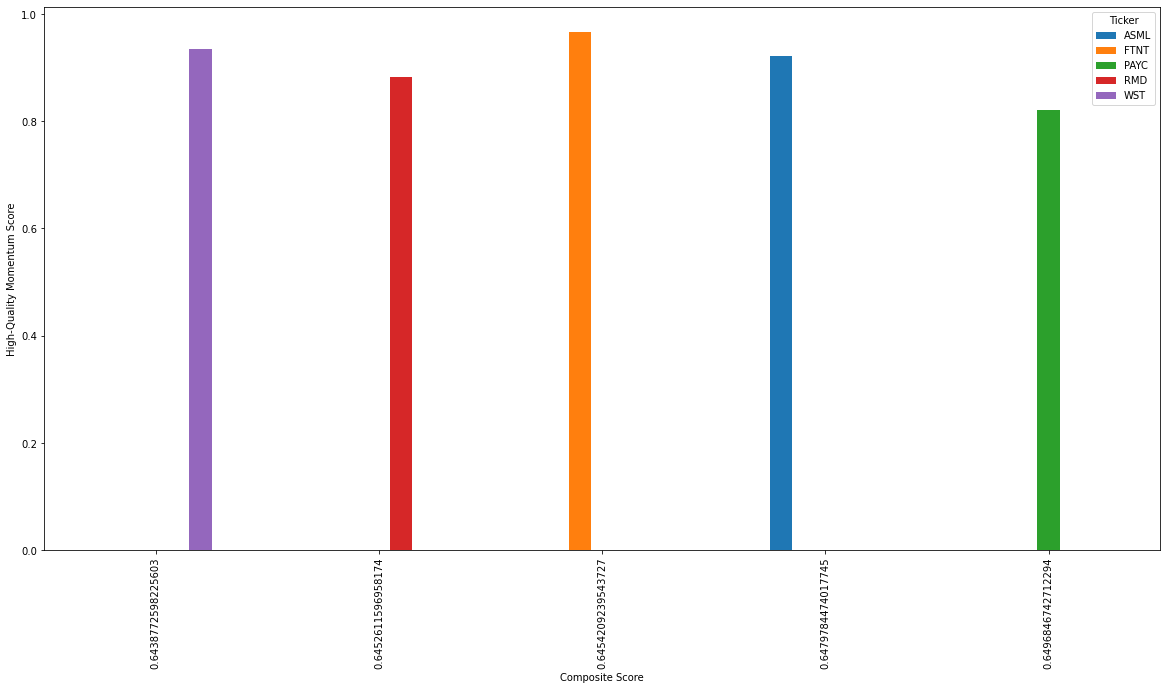

In [48]:
# Determine chart size.
plt.rcParams['figure.figsize'] = [20, 10]

# Group by Composite Score and Ticker columns.
mean_scores_01 = SPY_QQQ_df.groupby(['Ticker','Composite Score']).mean()

# Unstack the column Ticker.
mean_scores_01 = mean_scores_01.unstack()

# Get the cross-section of High-Quality Momentum Score in the 'columns' axis.
mean_scores_01 = mean_scores_01.xs('High-Quality Momentum Score', axis='columns').transpose()

# Plot a bar chart with pandas.
mean_scores_01.plot(kind = 'bar')

# Label y-axis.
plt.ylabel('High-Quality Momentum Score');

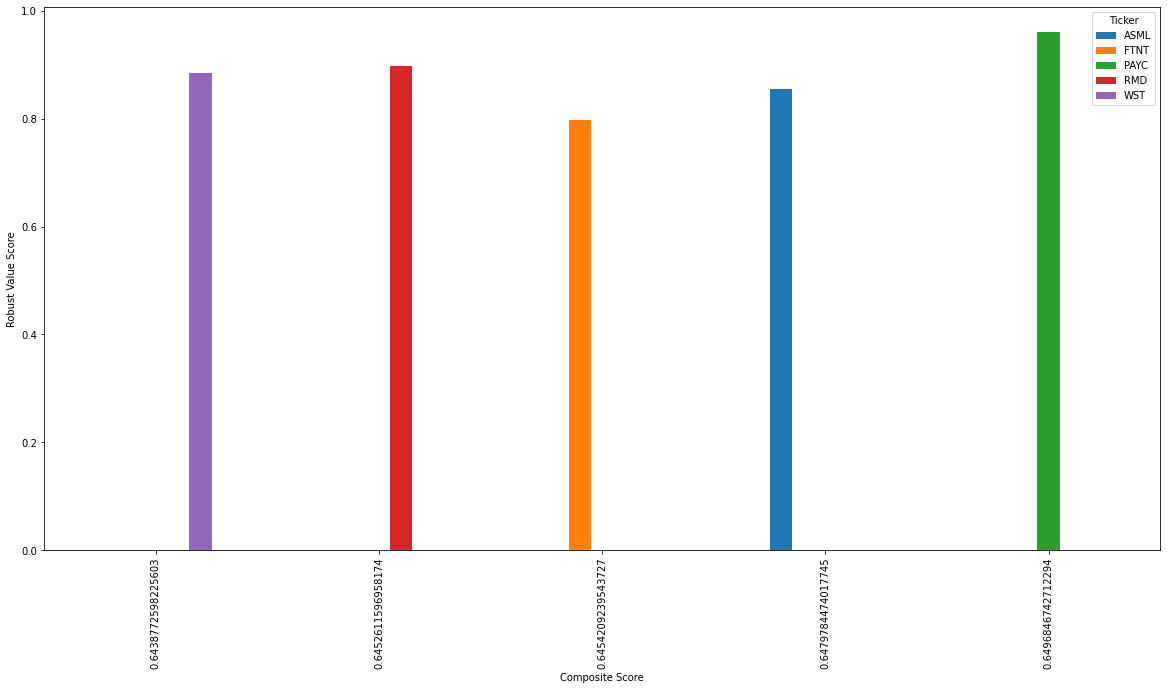

In [49]:
# Determine chart size.
plt.rcParams['figure.figsize'] = [20, 10]

# Group by Composite Score and Ticker columns.
mean_scores_02 = SPY_QQQ_df.groupby(['Ticker','Composite Score']).mean()

# Unstack the column Ticker.
mean_scores_02 = mean_scores_02.unstack()

# Get the cross-section of Robust Value Score in the 'columns' axis.
mean_scores_02 = mean_scores_02.xs('Robust Value Score', axis='columns').transpose()

# Plot a bar chart with pandas.
mean_scores_02.plot(kind = 'bar')

# Label y-axis.
plt.ylabel('Robust Value Score');

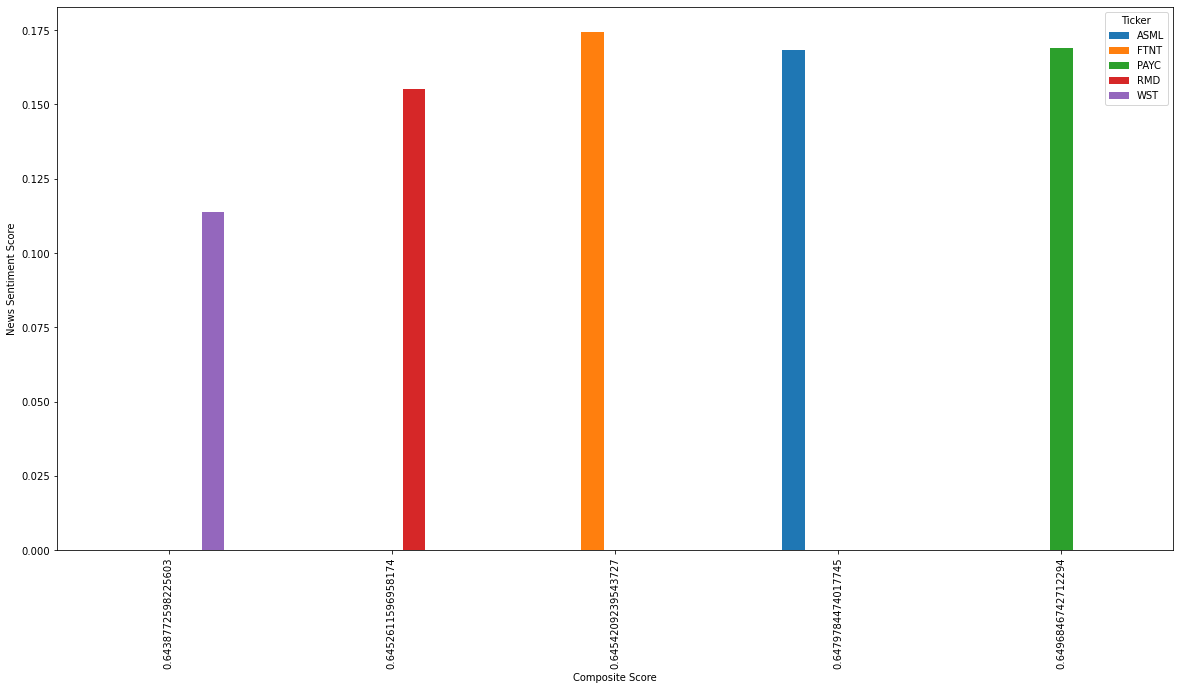

In [50]:
# Determine chart size.
plt.rcParams['figure.figsize'] = [20, 10]

# Group by Composite Score and Ticker columns.
mean_scores_03 = SPY_QQQ_df.groupby(['Ticker','Composite Score']).mean()

# Unstack the column Ticker.
mean_scores_03 = mean_scores_03.unstack()

# Get the cross-section of News Sentiment Score in the 'columns' axis.
mean_scores_03 = mean_scores_03.xs('News Sentiment Score', axis='columns').transpose()

# Plot a bar chart with pandas.
mean_scores_03.plot(kind = 'bar')

# Label y-axis.
plt.ylabel('News Sentiment Score');

In [51]:
# Extract Tickers from recommended ticker column and assign to each separatly to a variable.
Stock_01_df = SPY_QQQ_Portfolio.iloc[[0],[3]]
Stock_01 = Stock_01_df['Ticker'].values[0]

Stock_02_df = SPY_QQQ_Portfolio.iloc[[1],[3]]
Stock_02 = Stock_02_df['Ticker'].values[0]

Stock_03_df = SPY_QQQ_Portfolio.iloc[[2],[3]]
Stock_03 = Stock_03_df['Ticker'].values[0]

Stock_04_df = SPY_QQQ_Portfolio.iloc[[3],[3]]
Stock_04 = Stock_04_df['Ticker'].values[0]

Stock_05_df = SPY_QQQ_Portfolio.iloc[[4],[3]]
Stock_05 = Stock_05_df['Ticker'].values[0]

# FIRST STOCK MACHINE LEARNING #

## Loading the data

Next, we extract the data required for our analysis using pandas datareader. 

In [52]:
# Set Alpaca API key and secret.
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [54]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [55]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-08-17", tz="America/New_York").isoformat()

# Get 1 year's worth of historical data for Stock_01.
df_Stock_01 = alpaca.get_barset(
    Stock_01,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data.
df_Stock_01.count()

FTNT  open      1000
      high      1000
      low       1000
      close     1000
      volume    1000
dtype: int64

In [56]:
# Shape of the data.
df_Stock_01.tail()

FTNT                                  
                             open    high       low   close  volume
time                                                               
2021-08-11 00:00:00-04:00  301.16  302.98  293.7076  298.64  871783
2021-08-12 00:00:00-04:00  299.34  309.79  298.2800  305.59  897462
2021-08-13 00:00:00-04:00  303.94  309.53  302.2100  309.37  534405
2021-08-16 00:00:00-04:00  309.00  309.00  298.6700  302.60  689011
2021-08-17 00:00:00-04:00  301.67  302.27  295.1895  298.64  773167

## Data Preparation

In [57]:
# Prepare data.
Stock_01_data = df_Stock_01.loc[:,Stock_01]
Stock_01_data.head()

,open,high,low,close,volume
time,,,,,
2017-08-28 00:00:00-04:00,37.21,37.32,37.0400,37.260,321998
2017-08-29 00:00:00-04:00,37.00,37.49,36.9500,37.365,399069
2017-08-30 00:00:00-04:00,37.39,37.90,37.2901,37.850,450683
2017-08-31 00:00:00-04:00,37.95,38.42,37.9100,38.220,727960
2017-09-01 00:00:00-04:00,38.41,38.61,38.0600,38.310,578823


In [58]:
# Check for null values and remove null values if any.
print('Null Values =',Stock_01_data.isnull().values.any())

Null Values = False


In [59]:
# Calculate daily return.
Stock_01_data['daily_return'] = Stock_01_data['close'].pct_change()
Stock_01_data['upside'] = np.where(Stock_01_data['daily_return'] > 0, 1.0, 0.0)

Stock_01_data.head()

,open,high,low,close,volume,daily_return,upside
time,,,,,,,
2017-08-28 00:00:00-04:00,37.21,37.32,37.0400,37.260,321998,NaN,0.0
2017-08-29 00:00:00-04:00,37.00,37.49,36.9500,37.365,399069,0.002818,1.0
2017-08-30 00:00:00-04:00,37.39,37.90,37.2901,37.850,450683,0.012980,1.0
2017-08-31 00:00:00-04:00,37.95,38.42,37.9100,38.220,727960,0.009775,1.0
2017-09-01 00:00:00-04:00,38.41,38.61,38.0600,38.310,578823,0.002355,1.0


## Feature Engineering

Our approach is based on price momentum. We will derive momentum fatures that will be used to predict future signals.

The current Data consists of date, open, high, low, close and volume. Following momentum indicatord are calculated using this data. 
* **Exponential Moving Average** : provides an indication of the overall trend of the price movement by smooting high volatility of the price movement.  
* **Stochastic Oscillator %K and %D** : a momentum indicator that compares a closing price to a range of its prices over a certain period of time. %K and %D are slow and fast indicators.
* **Relative Strength Index(RSI)** : a momentum indicator that measures the magnitude of recent price changes and indicates if the stock is overbought or oversold. 
* **Rate Of Change(ROC)**: a momentum oscillator that measures the percentage change between the current price and the n period past price. 
* **Momentum (MOM)** : measure the speed at which the price is changing.

In [60]:
Stock_01_data['EMA10'] = EMA(Stock_01_data, 10)
Stock_01_data['EMA30'] = EMA(Stock_01_data, 30)
Stock_01_data['EMA200'] = EMA(Stock_01_data, 200)

In [61]:
Stock_01_data['ROC10'] = ROC(Stock_01_data['close'], 10)
Stock_01_data['ROC30'] = ROC(Stock_01_data['close'], 30)

In [62]:
Stock_01_data['MOM10'] = MOM(Stock_01_data['close'], 10)
Stock_01_data['MOM30'] = MOM(Stock_01_data['close'], 30)

In [63]:
Stock_01_data['RSI10'] = RSI(Stock_01_data['close'], 10)
Stock_01_data['RSI30'] = RSI(Stock_01_data['close'], 30)
Stock_01_data['RSI200'] = RSI(Stock_01_data['close'], 200)

In [64]:
Stock_01_data['%D10'] = STOD(Stock_01_data['close'], Stock_01_data['low'], Stock_01_data['high'], 10)
Stock_01_data['%K30'] = STOK(Stock_01_data['close'], Stock_01_data['low'], Stock_01_data['high'], 30)
Stock_01_data['%D30'] = STOD(Stock_01_data['close'], Stock_01_data['low'], Stock_01_data['high'], 30)
Stock_01_data['%K200'] = STOK(Stock_01_data['close'], Stock_01_data['low'], Stock_01_data['high'], 200)
Stock_01_data['%D200'] = STOD(Stock_01_data['close'], Stock_01_data['low'], Stock_01_data['high'], 200)

In [65]:
Stock_01_data['MA10'] = SMA(Stock_01_data, 10)
Stock_01_data['MA30'] = SMA(Stock_01_data, 30)
Stock_01_data['MA200'] = SMA(Stock_01_data, 200)

In [66]:
Stock_01_data.tail(2)

,open,high,low,close,volume,daily_return,upside,EMA10,EMA30,EMA200,...,RSI30,RSI200,%D10,%K30,%D30,%K200,%D200,MA10,MA30,MA200
time,,,,,,,,,,,,,,,,,,,,,
2021-08-16 00:00:00-04:00,309.00,309.00,298.6700,302.60,689011,-0.021883,0.0,299.007704,279.443762,204.199606,...,71.044430,62.624817,87.802342,88.796086,94.147716,96.458826,98.061137,302.321,276.632667,188.954196
2021-08-17 00:00:00-04:00,301.67,302.27,295.1895,298.64,773167,-0.013087,0.0,298.940848,280.682229,205.139354,...,68.440007,62.162141,67.398053,82.625362,90.262750,94.508471,96.920147,302.411,278.216000,189.857296


In [67]:
# Exclude columns that are not needed for prediction.
Stock_01_data_bkup = Stock_01_data.copy()
Stock_01_data = Stock_01_data.drop(['high','low','open','volume','daily_return'], axis=1)

In [68]:
Stock_01_data = Stock_01_data.dropna(axis=0)

In [69]:
Stock_01_data.tail(2)

,close,upside,EMA10,EMA30,EMA200,ROC10,ROC30,MOM10,MOM30,RSI10,RSI30,RSI200,%D10,%K30,%D30,%K200,%D200,MA10,MA30,MA200
time,,,,,,,,,,,,,,,,,,,,
2021-08-16 00:00:00-04:00,302.60,0.0,299.007704,279.443762,204.199606,1.632297,20.490563,17.98,54.55,66.759996,71.044430,62.624817,87.802342,88.796086,94.147716,96.458826,98.061137,302.321,276.632667,188.954196
2021-08-17 00:00:00-04:00,298.64,0.0,298.940848,280.682229,205.139354,-1.769620,17.885762,0.90,47.50,60.574804,68.440007,62.162141,67.398053,82.625362,90.262750,94.508471,96.920147,302.411,278.216000,189.857296


## Data Visualization

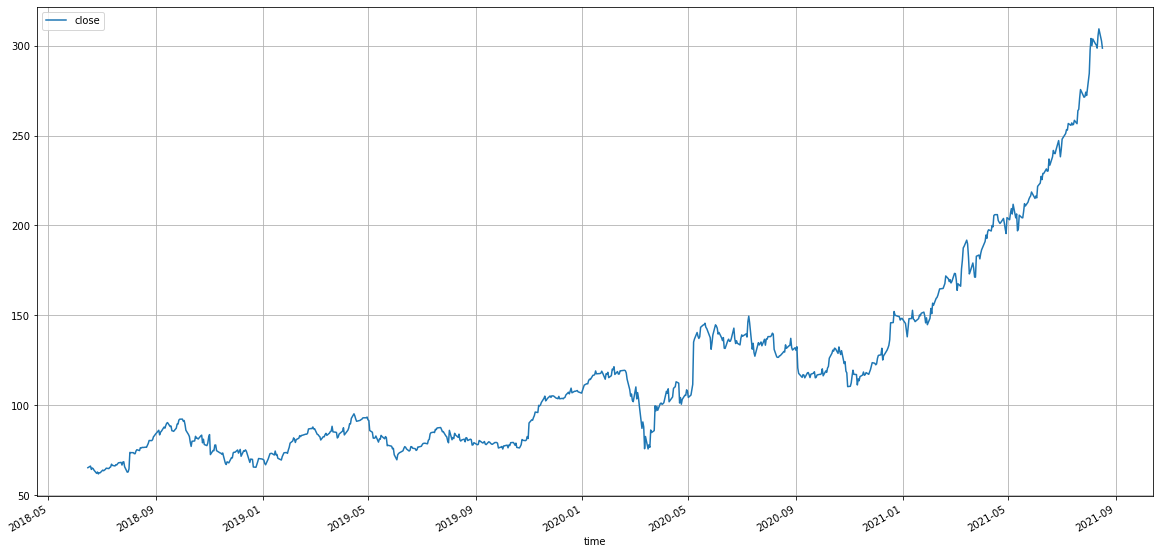

In [70]:
# Visualize data.
Stock_01_data[['close']].plot(grid=True)
plt.show()

In [71]:
Stock_01_data=Stock_01_data.drop(['close'], axis=1)

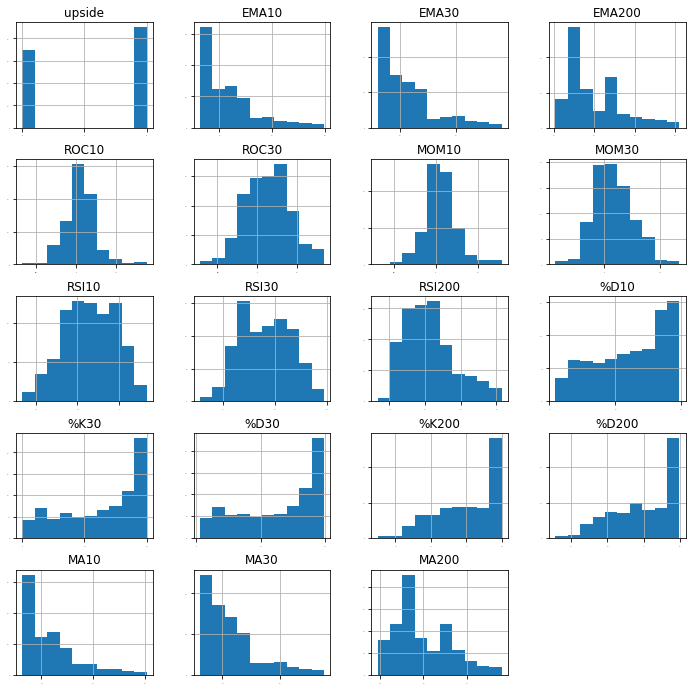

In [72]:
# Histograms to understand how data is distributed.
Stock_01_data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

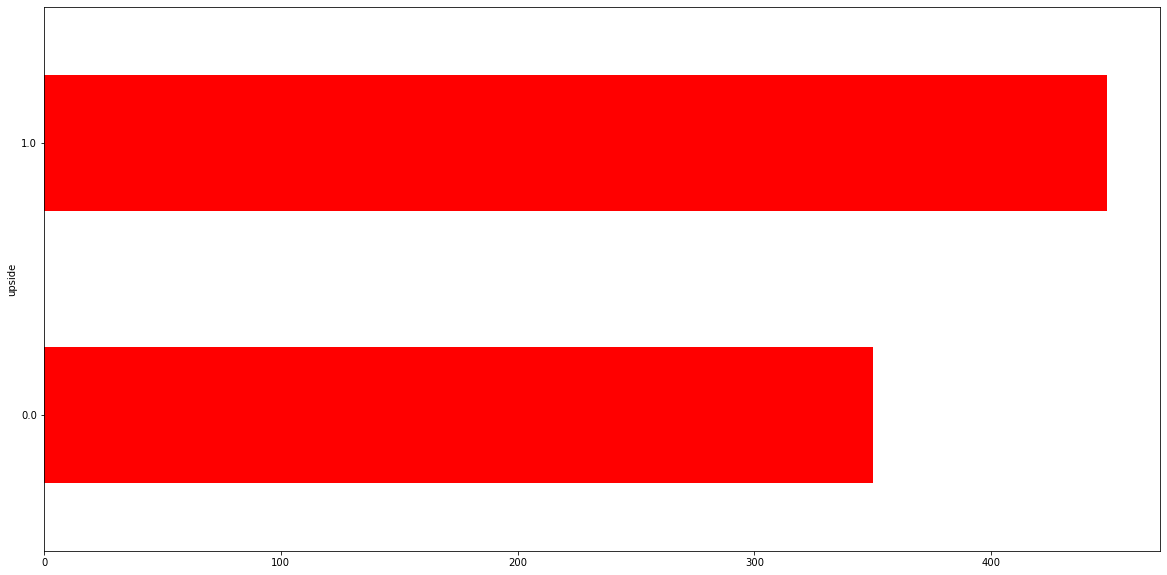

In [73]:
fig = plt.figure()
plot = Stock_01_data.groupby(['upside']).size().plot(kind='barh', color='red')
plt.show()

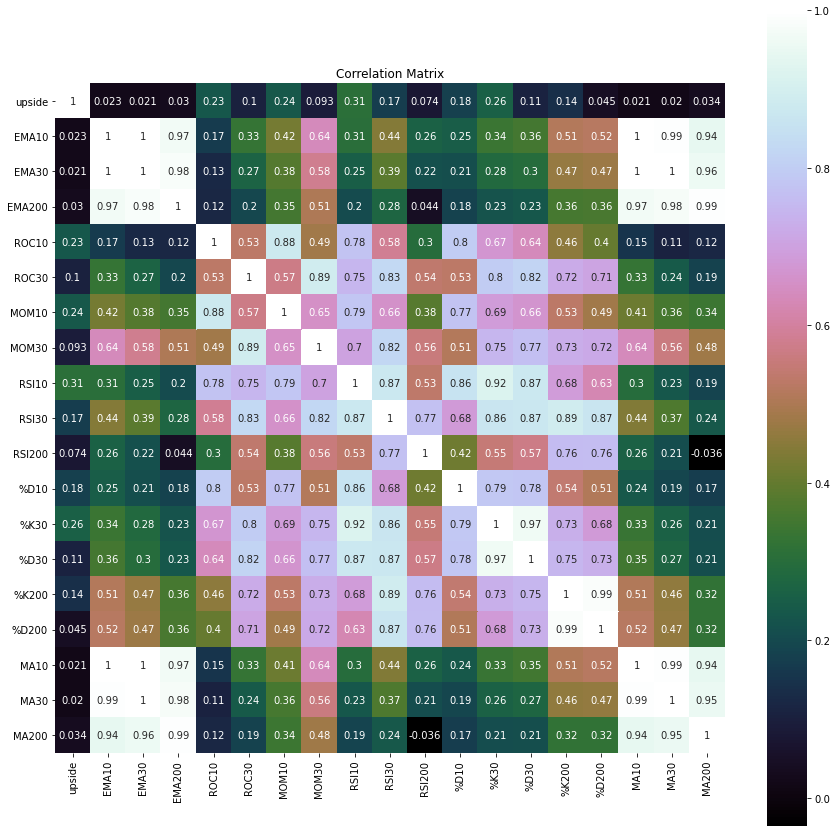

In [74]:
# Correlation.
correlation = Stock_01_data.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix');

# Model training and evaluation

In [75]:
# Construct training start and end dates.
training_start = Stock_01_data.index.min().strftime(format= '%Y-%m-%d')
training_end = '2020-09-30'

# Construct testing start and end dates.
testing_start =  '2020-08-01'
testing_end = Stock_01_data.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates.
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2018-06-15
Training End: 2020-09-30
Testing Start: 2020-08-01
Testing End: 2021-08-17


In [76]:
# Split out validation dataset for the end.
y_train = Stock_01_data["upside"][training_start:training_end]
X_train = Stock_01_data.loc[:, Stock_01_data.columns != 'upside'][training_start:training_end]

y_test = Stock_01_data["upside"][testing_start:testing_end]
X_test = Stock_01_data.loc[:, Stock_01_data.columns != 'upside'][testing_start:testing_end]

In [77]:
# Standard scaling.
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [78]:
# Evaluation metrics for classification.
num_folds = 5
seed = 7
scoring = 'accuracy'
#scoring = 'precision'
#scoring = 'recall'
#scoring = 'roc_auc'

## Models

In [79]:
models = []
models.append(('LR', LogisticRegression(n_jobs=-1)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

# Ensable Models.
# Boosting methods.
models.append(('AB', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier()))

models.append(('RF', RandomForestClassifier(n_jobs=-1)))

In [80]:
models

[('LR', LogisticRegression(n_jobs=-1)),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('AB', AdaBoostClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=None)),
 ('RF', RandomForestClassifier(n_jobs=-1))]

In [81]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, rescaledX_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.799355 (0.040065)
KNN: 0.579790 (0.057159)
CART: 0.685172 (0.042885)
AB: 0.716327 (0.064161)
[17:53:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:53:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like 

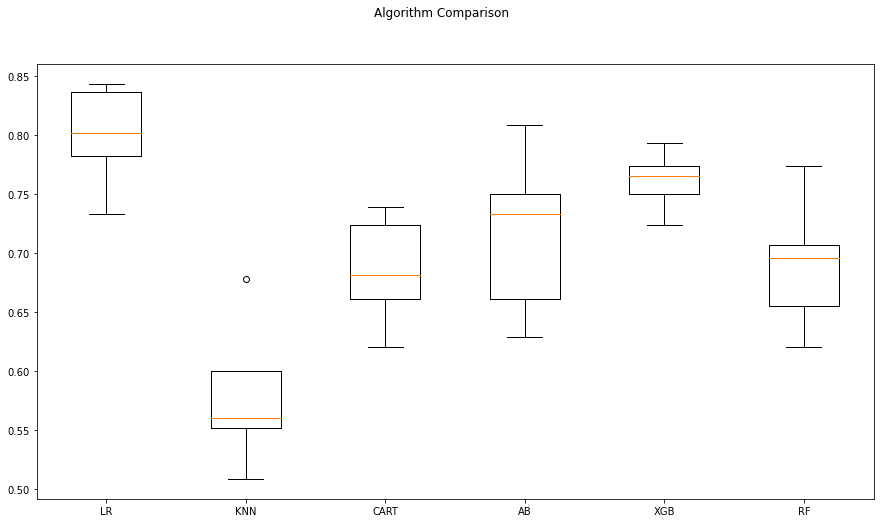

In [82]:
# Compare algorithms.
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
plt.show()

# RANDOM FOREST #

## Hyper Parameter Tuning for RandomForest with Grid Search

In [83]:
criterion = ["gini","entropy"]
n_estimators = [20,40,80]
max_depth = range(1,10)

param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, criterion = criterion )
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX_train, y_train)

# Print Results.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.714483 using {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 80}
#53 0.614153 (0.039976) with: {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 20}
#51 0.624543 (0.026831) with: {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 40}
#49 0.627961 (0.034884) with: {'criterion': 'gini', 'max_depth': 1, 'n_estimators': 80}
#39 0.643568 (0.030907) with: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 20}
#41 0.640105 (0.036759) with: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 40}
#48 0.628006 (0.033467) with: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 80}
#34 0.650585 (0.018949) with: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 20}
#36 0.648681 (0.045148) with: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 40}
#38 0.645292 (0.042614) with: {'criterion': 'gini', 'max_depth': 3, 'n_estimators': 80}
#30 0.662609 (0.062051) with: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 20}
#33 0.652204 (0.037835) with: {'criterion

## Fit the model and Run the trained model on the test dataset

In [84]:
# Setup the model based on the parameters suggested by Grid Search.
model_rf = RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=80)
model_rf.fit(rescaledX_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=80)

In [85]:
# Accuracy metrics on the test set.
predictions = model_rf.predict(rescaledX_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7832699619771863
[[ 74  33]
 [ 24 132]]
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72       107
         1.0       0.80      0.85      0.82       156

    accuracy                           0.78       263
   macro avg       0.78      0.77      0.77       263
weighted avg       0.78      0.78      0.78       263



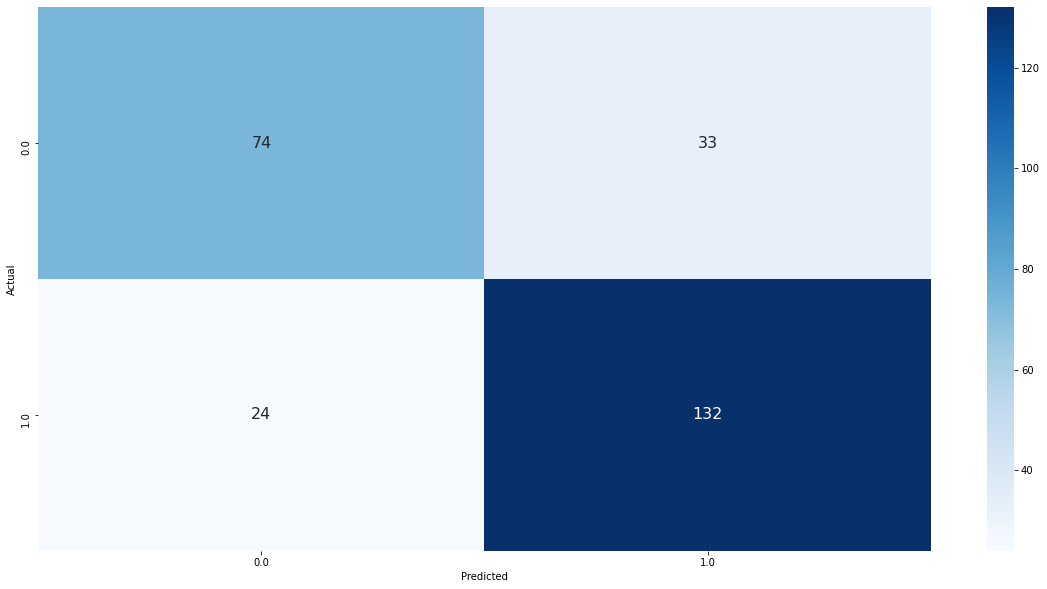

In [86]:
df_cm = pd.DataFrame(confusion_matrix(y_test, predictions), columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='d'); # font size

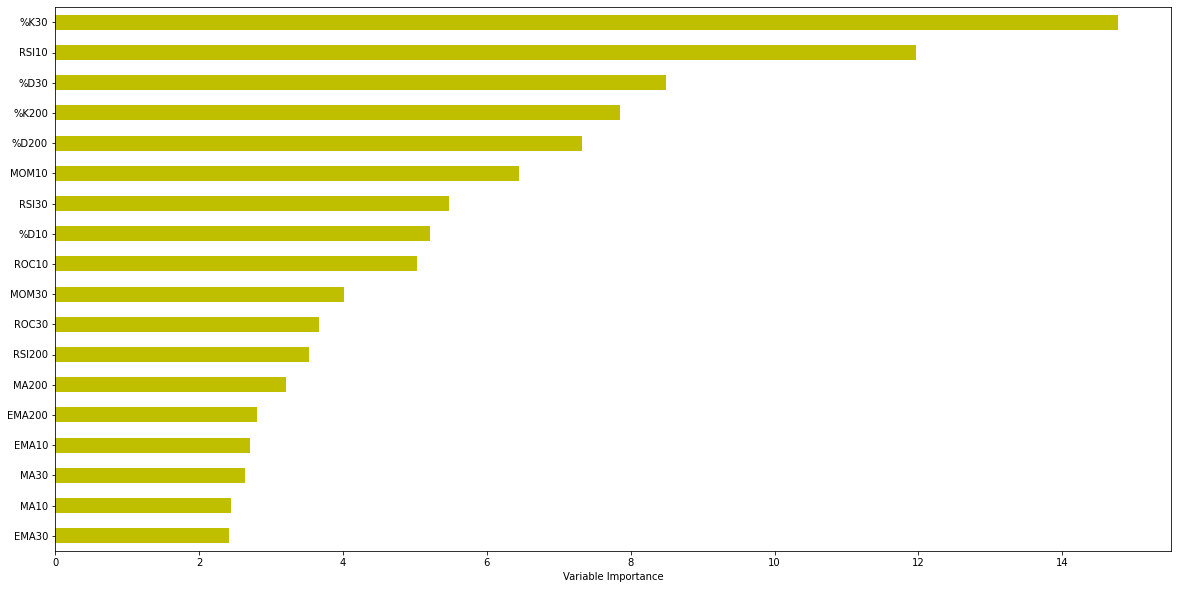

In [87]:
Importance = pd.DataFrame({'Importance':model_rf.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='y', legend=None )
plt.xlabel('Variable Importance');

# LOGISTIC REGRESSION

## Hyper Parameter Tuning for Logistic Regression with Grid Search

In [88]:
# Grid Search for Logistic Regression to maximize recall.
model = LogisticRegression()
param_grid = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX_train, y_train)

# Print Results.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.799190 using {'C': 25, 'penalty': 'l2'}
#9 nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
#8 0.589970 (0.033525) with: {'C': 0.001, 'penalty': 'l2'}
#10 nan (nan) with: {'C': 0.009, 'penalty': 'l1'}
#7 0.645307 (0.018444) with: {'C': 0.009, 'penalty': 'l2'}
#11 nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
#6 0.653958 (0.027495) with: {'C': 0.01, 'penalty': 'l2'}
#12 nan (nan) with: {'C': 0.09, 'penalty': 'l1'}
#5 0.762879 (0.030982) with: {'C': 0.09, 'penalty': 'l2'}
#13 nan (nan) with: {'C': 1, 'penalty': 'l1'}
#4 0.794003 (0.035015) with: {'C': 1, 'penalty': 'l2'}
#14 nan (nan) with: {'C': 5, 'penalty': 'l1'}
#2 0.795742 (0.035038) with: {'C': 5, 'penalty': 'l2'}
#15 nan (nan) with: {'C': 10, 'penalty': 'l1'}
#3 0.795712 (0.034817) with: {'C': 10, 'penalty': 'l2'}
#16 nan (nan) with: {'C': 25, 'penalty': 'l1'}
#1 0.799190 (0.030463) with: {'C': 25, 'penalty': 'l2'}


## Fit the model and Run the trained model on the test dataset

In [89]:
# Setup the model based on the parameters suggested by Grid Search.
model_lr = LogisticRegression(penalty = 'l2',C = 25)
model_lr.fit(rescaledX_train, y_train)

LogisticRegression(C=25)

In [90]:
# Accuracy metrics on the test set.
predictions = model_lr.predict(rescaledX_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7300380228136882
[[ 40  67]
 [  4 152]]
              precision    recall  f1-score   support

         0.0       0.91      0.37      0.53       107
         1.0       0.69      0.97      0.81       156

    accuracy                           0.73       263
   macro avg       0.80      0.67      0.67       263
weighted avg       0.78      0.73      0.70       263



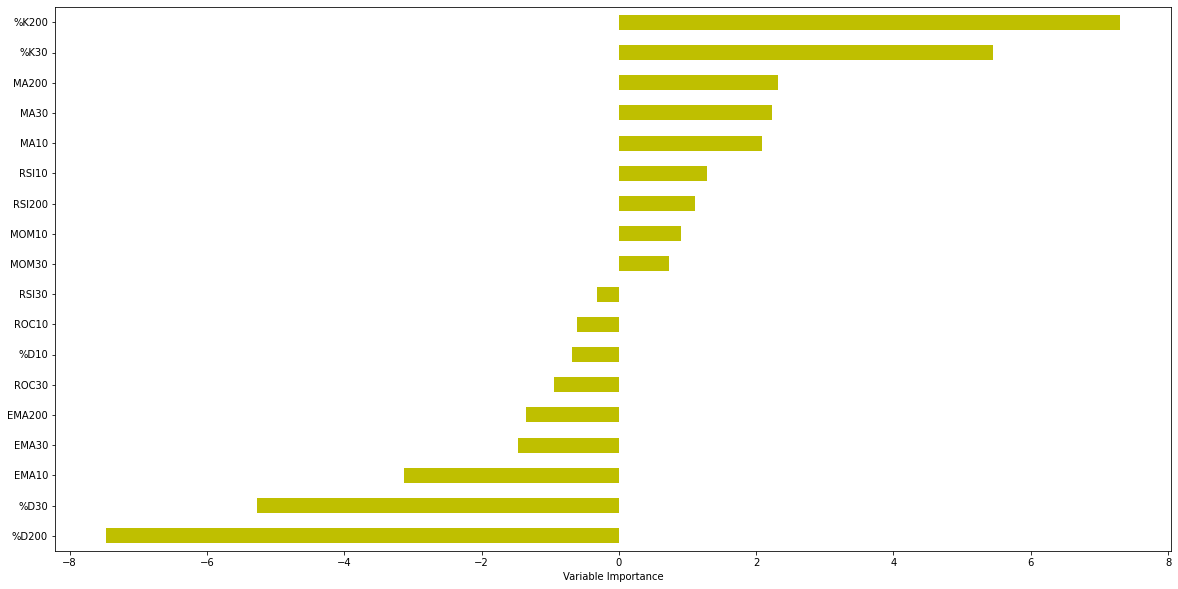

In [91]:
coeff = model_lr.coef_
cols = X_train.columns.values
#Importance = pd.DataFrame({'Importance':coeff.reshape(18,1)}, index=X_train.columns)
#Importance

Importance = pd.DataFrame(coeff.reshape(18,-1), index = cols)
Importance['Importance'] = Importance.iloc[:,0]

Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='y',legend=None )
plt.xlabel('Variable Importance');

# ADA BOOST

## Hyper Parameter Tuning for Adaboost with Grid Search

In [92]:
n_estimators = [40,80,200]
learning_rate = [0.001, 0.01, 0.1, 0.2, 0.5]

param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)
kfold = KFold(n_splits=num_folds)

# Instantiate GridSearchCV, fit model and make prediction.
model = AdaBoostClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX_train, y_train)


# Print Results.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.721439 using {'learning_rate': 0.5, 'n_estimators': 40}
#13 0.574378 (0.051733) with: {'learning_rate': 0.001, 'n_estimators': 40}
#13 0.574378 (0.051733) with: {'learning_rate': 0.001, 'n_estimators': 80}
#13 0.574378 (0.051733) with: {'learning_rate': 0.001, 'n_estimators': 200}
#11 0.598636 (0.026896) with: {'learning_rate': 0.01, 'n_estimators': 40}
#11 0.598636 (0.026896) with: {'learning_rate': 0.01, 'n_estimators': 80}
#10 0.605517 (0.031060) with: {'learning_rate': 0.01, 'n_estimators': 200}
#9 0.657346 (0.048633) with: {'learning_rate': 0.1, 'n_estimators': 40}
#6 0.676417 (0.026097) with: {'learning_rate': 0.1, 'n_estimators': 80}
#2 0.697196 (0.036065) with: {'learning_rate': 0.1, 'n_estimators': 200}
#7 0.672954 (0.036515) with: {'learning_rate': 0.2, 'n_estimators': 40}
#4 0.688486 (0.046756) with: {'learning_rate': 0.2, 'n_estimators': 80}
#3 0.695397 (0.046329) with: {'learning_rate': 0.2, 'n_estimators': 200}
#1 0.721439 (0.034410) with: {'learning_rate': 0.5, '

## Fit the model and Run the trained model on the test dataset

In [93]:
# Setup model based on parameters suggested by Grid Search.
model_ab = AdaBoostClassifier(n_estimators=40, learning_rate=0.5)
model_ab.fit(rescaledX_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=40)

In [94]:
# Accuracy metrics on the test set.
predictions = model_ab.predict(rescaledX_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7680608365019012
[[ 76  31]
 [ 30 126]]
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.71       107
         1.0       0.80      0.81      0.81       156

    accuracy                           0.77       263
   macro avg       0.76      0.76      0.76       263
weighted avg       0.77      0.77      0.77       263



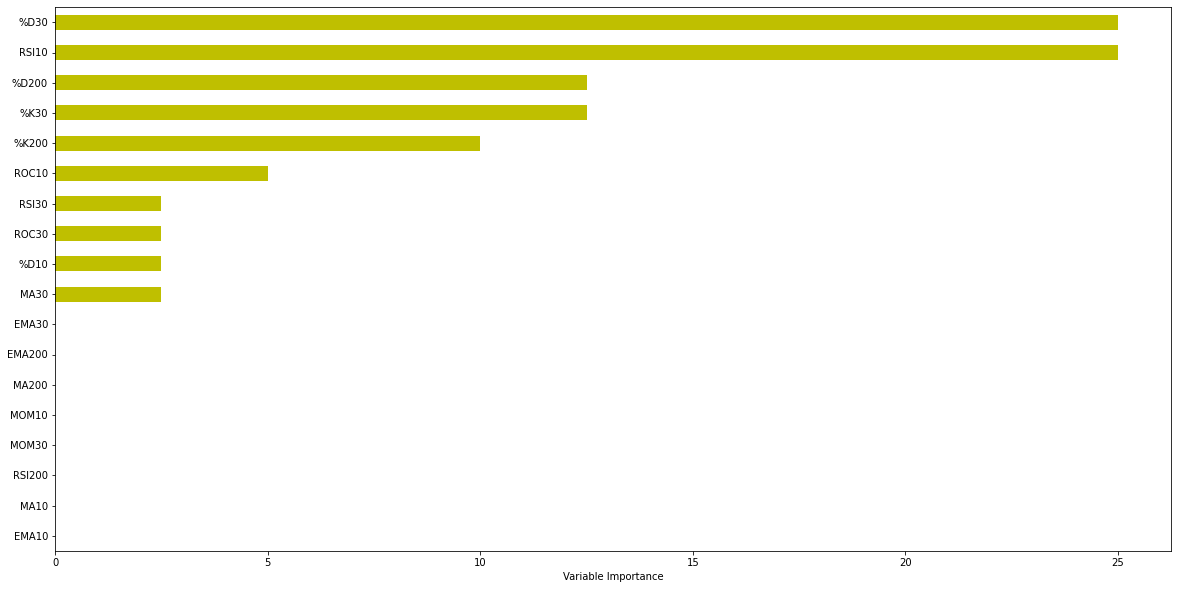

In [95]:
Importance = pd.DataFrame({'Importance':model_ab.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='y', legend=None )
plt.xlabel('Variable Importance');

# KNN classifier hyper parameter tuning

In [96]:
# List Hyperparameters that want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

# Convert to dictionary.
param_grid = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

kfold = KFold(n_splits=num_folds)

# Instantiate GridSearchCV, fit model and make prediction.
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX_train, y_train)


# Print Results.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.648666 using {'leaf_size': 1, 'n_neighbors': 3, 'p': 1}
#834 0.626282 (0.027762) with: {'leaf_size': 1, 'n_neighbors': 1, 'p': 1}
#2598 0.608921 (0.059512) with: {'leaf_size': 1, 'n_neighbors': 1, 'p': 2}
#2696 0.589925 (0.031622) with: {'leaf_size': 1, 'n_neighbors': 2, 'p': 1}
#2794 0.572474 (0.057863) with: {'leaf_size': 1, 'n_neighbors': 2, 'p': 2}
#1 0.648666 (0.055848) with: {'leaf_size': 1, 'n_neighbors': 3, 'p': 1}
#99 0.641739 (0.051190) with: {'leaf_size': 1, 'n_neighbors': 3, 'p': 2}
#246 0.634918 (0.062863) with: {'leaf_size': 1, 'n_neighbors': 4, 'p': 1}
#2745 0.589805 (0.046773) with: {'leaf_size': 1, 'n_neighbors': 4, 'p': 2}
#344 0.633178 (0.052309) with: {'leaf_size': 1, 'n_neighbors': 5, 'p': 1}
#589 0.631394 (0.039067) with: {'leaf_size': 1, 'n_neighbors': 5, 'p': 2}
#1912 0.619295 (0.063278) with: {'leaf_size': 1, 'n_neighbors': 6, 'p': 1}
#2304 0.612414 (0.049243) with: {'leaf_size': 1, 'n_neighbors': 6, 'p': 2}
#2108 0.614123 (0.064164) with: {'leaf_size':

## Fit the model and Run the trained model on the test dataset

In [97]:
# Setup the model based on the parameters suggested by Grid Search.
model_knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)
model_knn.fit(rescaledX_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)

In [98]:
# Accuracy metrics on the test set.
predictions = model_knn.predict(rescaledX_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6768060836501901
[[ 36  71]
 [ 14 142]]
              precision    recall  f1-score   support

         0.0       0.72      0.34      0.46       107
         1.0       0.67      0.91      0.77       156

    accuracy                           0.68       263
   macro avg       0.69      0.62      0.61       263
weighted avg       0.69      0.68      0.64       263



# DECISION TREE

## Decision Tree Hyper Parameter Tuning

In [99]:
criterion = ["gini","entropy"]
max_depth = range(1,10)
min_samples_split = range(1,10)
min_samples_leaf = range(1,5)

param_grid = dict(criterion = criterion, max_depth=max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX_train, y_train)

# Print Results.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.731874 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 9}
#648 nan (nan) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 1}
#513 0.574378 (0.051733) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
#513 0.574378 (0.051733) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 3}
#513 0.574378 (0.051733) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 4}
#513 0.574378 (0.051733) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 5}
#513 0.574378 (0.051733) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 6}
#513 0.574378 (0.051733) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 7}
#513 0.574378 (0.051733) with: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 

In [100]:
# Setup model based on parameters suggested by Grid Search.
model_cart = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 2, min_samples_split = 5)
model_cart.fit(rescaledX_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [101]:
# Accuracy metrics on test set.
predictions = model_cart.predict(rescaledX_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7224334600760456
[[ 87  20]
 [ 53 103]]
              precision    recall  f1-score   support

         0.0       0.62      0.81      0.70       107
         1.0       0.84      0.66      0.74       156

    accuracy                           0.72       263
   macro avg       0.73      0.74      0.72       263
weighted avg       0.75      0.72      0.72       263



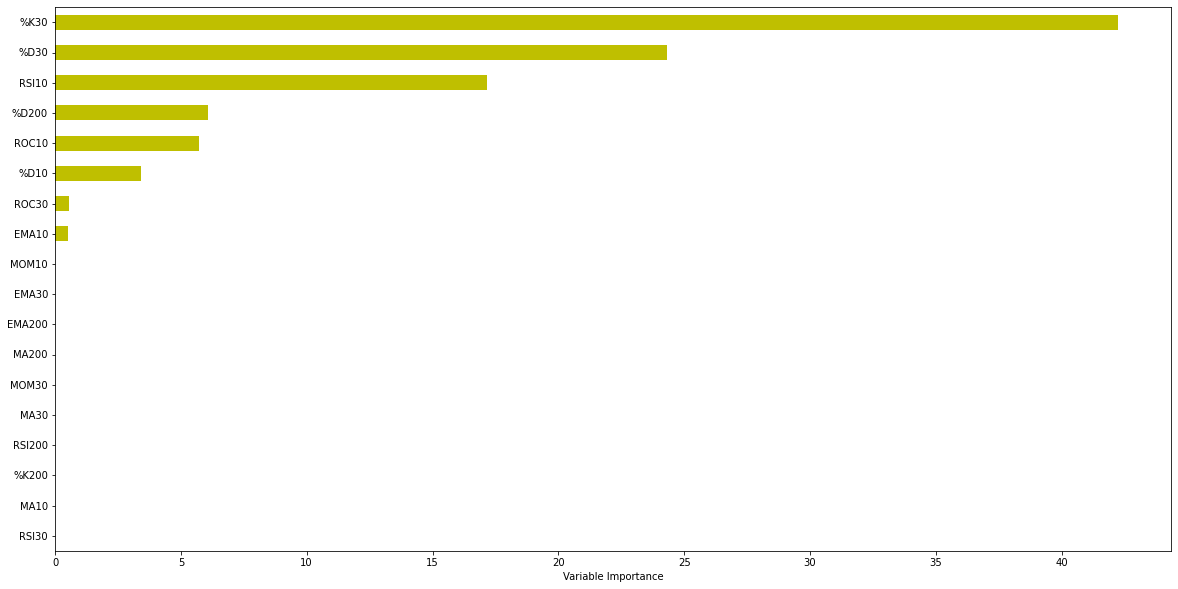

In [102]:
Importance = pd.DataFrame({'Importance':model_cart.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='y', legend=None )
plt.xlabel('Variable Importance');

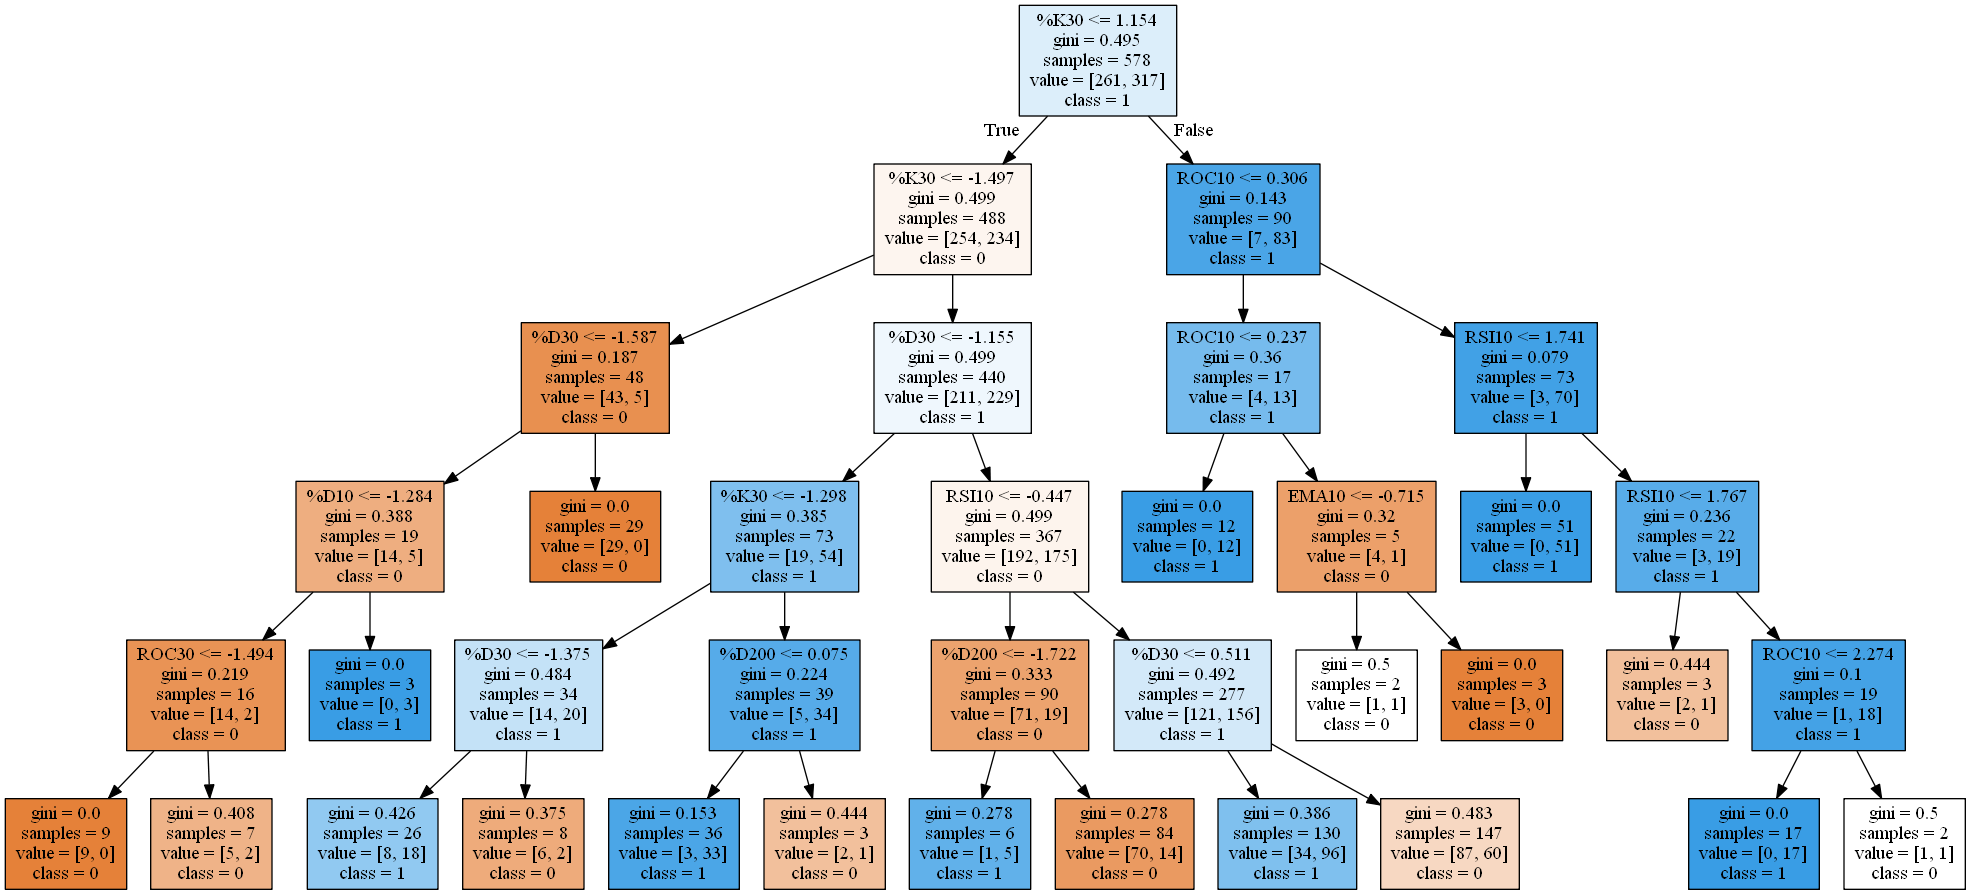

In [103]:
# Create DOT data
dot_data = tree.export_graphviz(
    model_cart, out_file=None, feature_names=X_train.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# XGBoost hyperparameter optimization

In [104]:
'''
max_depth = [3, 5, 6, 10, 15, 20]
learning_rate = [0.01, 0.1, 0.2, 0.3]
subsample = np.arange(0.5, 1.0, 0.1)
colsample_bytree = np.arange(0.4, 1.0, 0.1)
colsample_bylevel = np.arange(0.4, 1.0, 0.1)
n_estimators = [100, 500, 1000]

param_grid = dict(max_depth = max_depth, learning_rate = learning_rate, subsample = subsample, colsample_bytree = colsample_bytree, 
                 colsample_bylevel = colsample_bylevel, n_estimators = n_estimators)
model = XGBClassifier()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))
    '''

'\nmax_depth = [3, 5, 6, 10, 15, 20]\nlearning_rate = [0.01, 0.1, 0.2, 0.3]\nsubsample = np.arange(0.5, 1.0, 0.1)\ncolsample_bytree = np.arange(0.4, 1.0, 0.1)\ncolsample_bylevel = np.arange(0.4, 1.0, 0.1)\nn_estimators = [100, 500, 1000]\n\nparam_grid = dict(max_depth = max_depth, learning_rate = learning_rate, subsample = subsample, colsample_bytree = colsample_bytree, \n                 colsample_bylevel = colsample_bylevel, n_estimators = n_estimators)\nmodel = XGBClassifier()\nkfold = KFold(n_splits=num_folds)\ngrid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)\ngrid_result = grid.fit(rescaledX, y_train)\n\n#Print Results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nranks = grid_result.cv_results_[\'rank_test_score\']\nfor mean, stdev, param, rank in zip(means

In [105]:
# Train XGB classifier with default hyper parameters.
model_xgb = XGBClassifier()
model_xgb.fit(rescaledX_train, y_train)

[17:58:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
# Accuracy metrics on test set.
predictions = model_xgb.predict(rescaledX_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8288973384030418
[[ 79  28]
 [ 17 139]]
              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78       107
         1.0       0.83      0.89      0.86       156

    accuracy                           0.83       263
   macro avg       0.83      0.81      0.82       263
weighted avg       0.83      0.83      0.83       263



# AUC-ROC curve for all classification models

In [107]:
# Predict probabilities.
pred_prob_rf = model_rf.predict_proba(rescaledX_test)
pred_prob_lr = model_lr.predict_proba(rescaledX_test)
pred_prob_ab = model_ab.predict_proba(rescaledX_test)
pred_prob_knn = model_knn.predict_proba(rescaledX_test)
pred_prob_cart = model_cart.predict_proba(rescaledX_test)
pred_prob_xgb = model_xgb.predict_proba(rescaledX_test)

In [108]:
# ROC Curve for models.
fpr_rf, tpr_rf, thresh_rf = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr_lr, tpr_lr, thresh_lr = roc_curve(y_test, pred_prob_lr[:,1], pos_label=1)
fpr_ab, tpr_ab, thresh_ab = roc_curve(y_test, pred_prob_ab[:,1], pos_label=1)
fpr_knn, tpr_knn, thresh_knn = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr_cart, tpr_cart, thresh_cart = roc_curve(y_test, pred_prob_cart[:,1], pos_label=1)
fpr_xgb, tpr_xgb, thresh_xgb = roc_curve(y_test, pred_prob_xgb[:,1], pos_label=1)

In [109]:
# ROC Curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

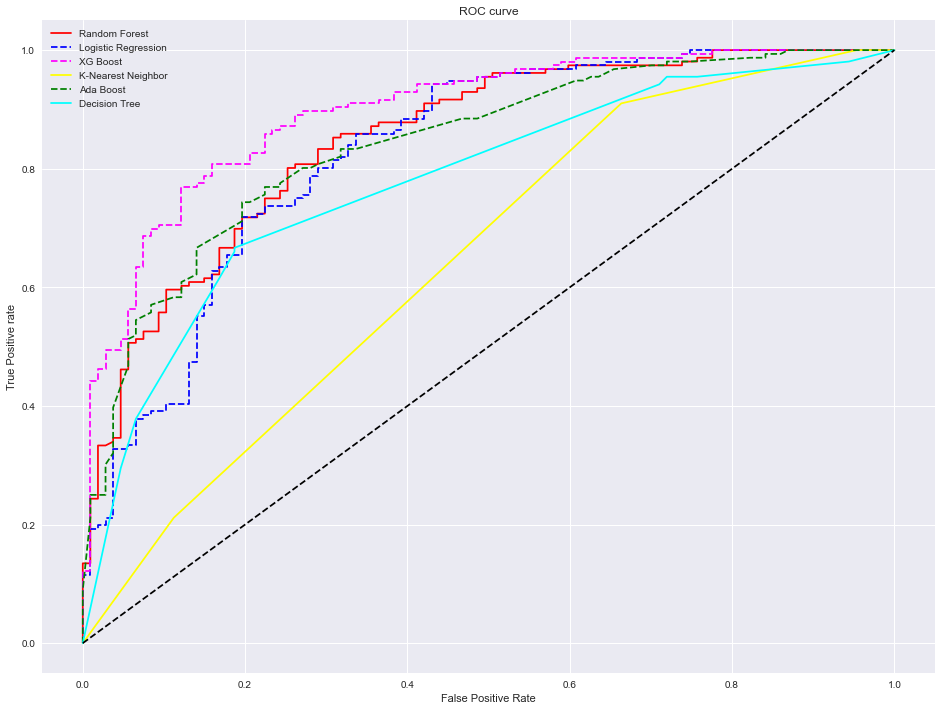

In [110]:
plt.style.use('seaborn')

# Resize.
plt.figure(figsize=[16,12])

# Plot roc curves.
plt.plot(fpr_rf, tpr_rf, linestyle='-',color='red', label='Random Forest')
plt.plot(fpr_lr, tpr_lr, linestyle='--',color='blue', label='Logistic Regression')
plt.plot(fpr_xgb, tpr_xgb, linestyle='--',color='magenta', label='XG Boost')
plt.plot(fpr_knn, tpr_knn, linestyle='-',color='yellow', label='K-Nearest Neighbor')
plt.plot(fpr_ab, tpr_ab, linestyle='--',color='green', label='Ada Boost')
plt.plot(fpr_cart, tpr_cart, linestyle='-',color='cyan', label='Decision Tree')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')

# Title.
plt.title('ROC curve')

# X label.
plt.xlabel('False Positive Rate')

# Y label.
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [111]:
# AUC scores.
print(f"AUC score for Random Forest      : {roc_auc_score(y_test, pred_prob_rf[:,1])}")
print(f"AUC score for Logistic Regression: {roc_auc_score(y_test, pred_prob_lr[:,1])}")
print(f"AUC score for XG Boost           : {roc_auc_score(y_test, pred_prob_xgb[:,1])}")
print(f"AUC score for K-Nearest Neighbor : {roc_auc_score(y_test, pred_prob_knn[:,1])}")
print(f"AUC score for AdaBoost           : {roc_auc_score(y_test, pred_prob_ab[:,1])}")
print(f"AUC score for Decision Trees     : {roc_auc_score(y_test, pred_prob_cart[:,1])}")

AUC score for Random Forest      : 0.8507967888809009
AUC score for Logistic Regression: 0.8294991612748622
AUC score for XG Boost           : 0.8967768991133478
AUC score for K-Nearest Neighbor : 0.6445902228612509
AUC score for AdaBoost           : 0.8416307213036185
AUC score for Decision Trees     : 0.7782470644620177


# Final Model

In [112]:
# Accuracy metrics on test set.
predictions = model_xgb.predict(rescaledX_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.8288973384030418
[[ 79  28]
 [ 17 139]]
              precision    recall  f1-score   support

         0.0       0.82      0.74      0.78       107
         1.0       0.83      0.89      0.86       156

    accuracy                           0.83       263
   macro avg       0.83      0.81      0.82       263
weighted avg       0.83      0.83      0.83       263



In [113]:
predictions

array([1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 0.

# BACKTESTING

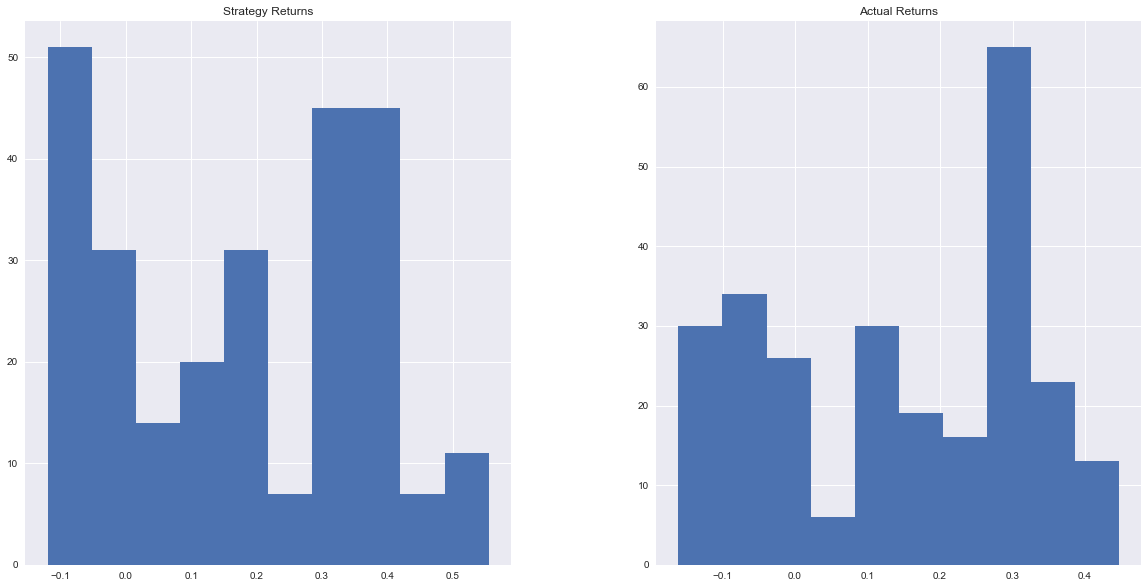

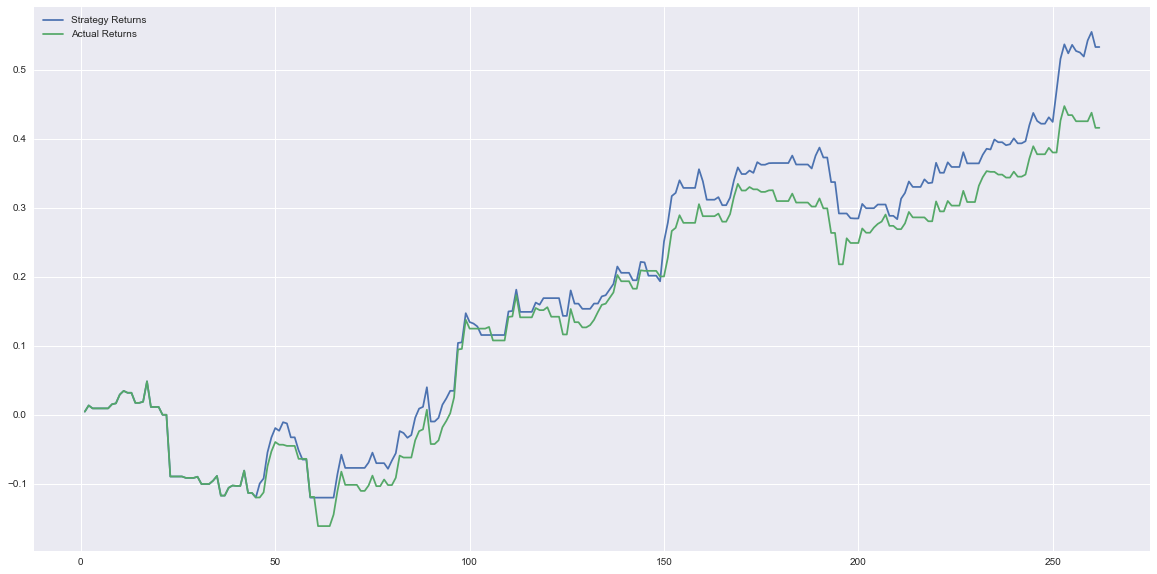

In [114]:
# Create column for Strategy Returns by multiplying daily returns by position held at close of business previous day.
backtestdata = pd.DataFrame(index=X_test.index)
backtestdata['signal_pred'] = predictions
backtestdata['signal_actual'] = y_test
test_close_data = Stock_01_data_bkup[testing_start:testing_end]
backtestdata['Market Returns'] = test_close_data['close'].pct_change()
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(1)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)
backtestdata=backtestdata.reset_index()
backtestdata.head()

fig = plt.figure(figsize = (20,10))
ax = fig.gca()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist(ax = ax)
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot(figsize=[20,10]);